# Natural disasters, Climate change and Economic development

In this project we have explored how the financial situation in a country affects the number of poleple affected by droughts and heat waves.

## 1. Motivation

### 1.1 What is your dataset?

We first decided we wanted to analyze and visualize the effect of natural disasters, especially droughts and heatwaves; the dataset on the impact of natural disasters from 1900 was obtained from [EM-DAT](https://public.emdat.be/). A database about natular disasters created by [Centre for Research on the Epidemiology of Disasters - CRED of the School of Public Health Université catholique de Louvain](https://www.emdat.be/about) .  A database about natular disasters created by [Centre for Research on the Epidemiology of Disasters - CRED of the School of Public Health Université catholique de Louvain](https://www.emdat.be/about). It is known that natural disasters are getting more frequent with climate change, but we wanted to look into how natural disasters affected different countries based on how developed their economy os and their economic indicators. Therefore we also used economic and social data, such as GDP, agriculture data, income data, and water and energy use. We also used population data to normalize and visualize our data. The economic and social data came from the [world bank](https://www.worldbank.org/en/home?cid=ECR_GA_worldbank_EN_EXTP_search&gclid=Cj0KCQjwpPKiBhDvARIsACn-gzC8rOGW4jJO-dzt-ybEEgC5tuAsyht8pYRufY2TLFj_lEpbnRNLXlUaAjGzEALw_wcB). One other dataset that we have used is data that have to do with energy consumption from the research site [OurWorldInData](https://ourworldindata.org/energy). 

### 1.2 Why did you choose this/these particular dataset(s)?

The dataset about the effect of disasters from 1900 was our main interest, motivation and gave us the idea for the project.Also the wirld bank financial indicators are collected from a trustworhty organizations. The population data was used to normalize and in some of the visualizations. We chose the specific economic indicators because a drought or a heatwave should affect some of them like fresh water withdrawal or the cerial yield of a country. Moreover, we wanted to check the assumption that the financial situation both in country level but also in personal level results in droughts and heatwave affecting more poeple. Therefore, checking the distribution of the GDP in each category (agriculture, intustry, exports etc.) which have to do with each countrys economy but also GDP per capita and distrubution of income which give some intuition about the personal level would give us a better analisys of the situation.

### 1.3 What was your goal for the end user´s experience?

We wanted to tell the story of how natural disasters do not discriminate. Instead, they exacerbate existing inequalities, hitting countries with limited economic resources the hardest in an interactive and exploratory way. Give the reader a better insight into how natural disasters affect less economically developed countries and that the impact of climate change is also a server equity case. 

Comment from Evangelos: Basically we have seen that there is a discrimination. Countries with better economy less inequallity and not in the "west world" are affected more than prosperous "west" countries. And basically that was my personal intention.

## 2. Basic stats 

### importing needed python modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim
import missingno as msno
import plotly.graph_objs as go

In [123]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import pandas as pd
import plotly.offline as offline

### 2.1 Data preperation and cleaning 

In [2]:
# Opening file from local directory
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [ ]:
Countries_GDPC = pd.read_excel('GDP_per_capita.xls')
population = pd.read_excel('population.xls')

The dataset has the following columns

In [3]:
Natural_Disasters.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

Dis No, Seq, Event Name and Glide are columns that have to do with the identification of each Disaster incident. It seems that each row corresponds to a different disaster. 
Disaster Group , Disaster subGroup, Disaster Subtype, Disaster SubSubType are fields that have to do with the categorization of the disaster.We have dowloaded only the Natural disasters but the database has also technological disasters like train accidents. We have decided initialy to check on the Disaster subtype because it seemed  not extremely specific and at the same time not extremly general and check how many there were through time, how many have died and affected from them and how high the cost of the damages were.

In [4]:
Natural_Disasters['Disaster Type'].unique()

array(['Drought', 'Industrial accident', 'Earthquake',
       'Volcanic activity', 'Mass movement (dry)',
       'Miscellaneous accident', 'Storm', 'Flood', 'Transport accident',
       'Epidemic', 'Landslide', 'Wildfire', 'Extreme temperature', 'Fog',
       'Complex Disasters', 'Insect infestation', 'Impact',
       'Animal accident', 'Glacial lake outburst'], dtype=object)

In [5]:

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
NND = Natural_Disasters[['Dis No','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]


### Counting the number of the each type of natural disasters in the whole dataset

In [6]:
# by value_count we get a sorted array of the number of raws of ecah natural disaster subtype 
Categories = NND['Disaster Subtype'].value_counts()
len(Categories)

17

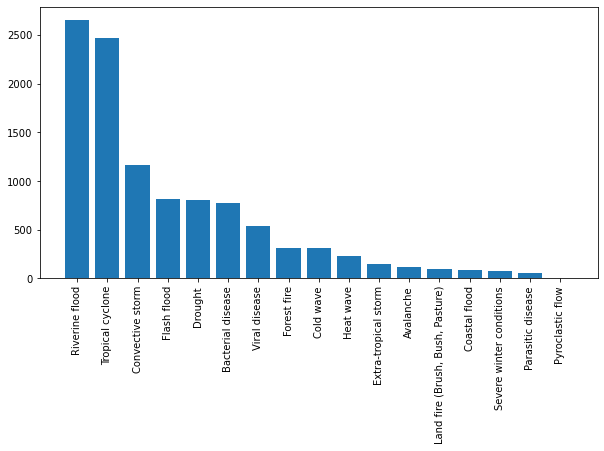

In [7]:

plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.show()

From the above diagram it seems that the Riverine floods and Tropical cyclone related disasters are very frequent. However we need to check more things.

### Now we need to check what happens through the decades 

In [8]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
#Categories

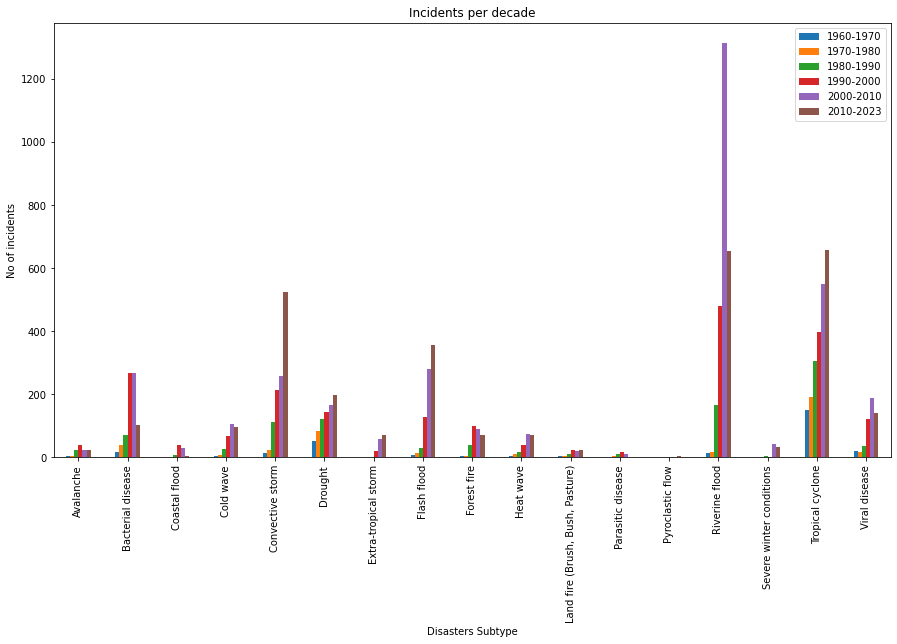

In [9]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)]['Disaster Subtype'].value_counts(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)]['Disaster Subtype'].value_counts(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)]['Disaster Subtype'].value_counts(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)]['Disaster Subtype'].value_counts(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)]['Disaster Subtype'].value_counts(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)]['Disaster Subtype'].value_counts()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('Incidents per decade')
plt.xlabel('Disasters Subtype')
plt.ylabel('No of incidents')
plt.show()



In most of the natural disasters their frequency increases each decade

### Try to find a way to determine the location of a soecific natural disaster

In [10]:
location_name = 'Chikoma'
country = 'ZMB'

# geocode the location using geopandas
geolocator = Nominatim(user_agent='natural_disaster_analysis')
location = geolocator.geocode('1600 Pennsylvania Avenue NW, Washington, DC 20500')

# extract the latitude and longitude from the result
latitude = location.latitude
longitude = location.longitude

print(f'The latitude and longitude of {location_name} in {country} are ({latitude}, {longitude}).')

The latitude and longitude of Chikoma in ZMB are (38.897699700000004, -77.03655315).


### Frequency Mapping 

We have made some plotting at the world map. Based on the previous observation that the natural disasters become more frequent throughout the years. For that reason we have made two dataframes. One for before 2000 and one for after 2000 with the same maximum value in order to visualize the difference.

In [11]:
# counting based on ISO (country code) and Disaster Subtype.
Disaster_Country= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
# filtering before 2000
Disaster_Country_Before_1980= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
#filtering after 2000
Disaster_Country_After_1980= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count()


In [12]:
# when we use group by the parameters of the call are used as an index 
# by using reset_index we ensure that the indexes become again columns

Disaster_Country = Disaster_Country.reset_index()

In [13]:
# Getting only the Drought data
Droughts = Disaster_Country[Disaster_Country['Disaster Subtype']=='Drought']
Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


C:\Users\asmun\AppData\Local\Temp\ipykernel_34572\1005535292.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


In order to make the process easier we have automated the map plotting with a function

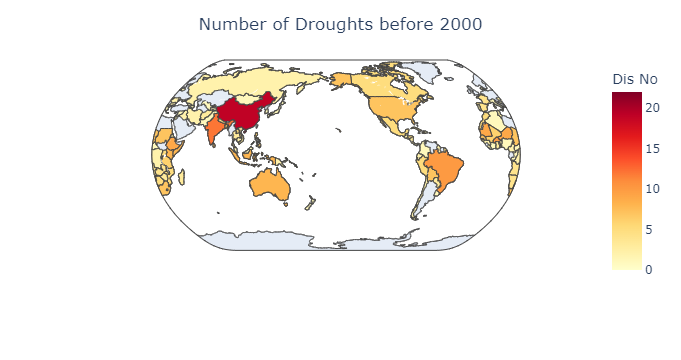

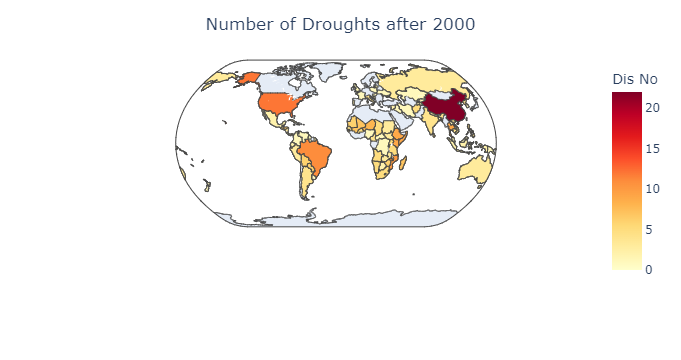

In [14]:
# a function that gets the type of disaster and the colour to be used as input and pro


def mapping(DF_After = Disaster_Country_After_1980 , DF_Before = Disaster_Country_Before_1980, subtype = 'Drought',colour = 'YlOrRd',Value = 'Dis No' ):
    """
        A function that gets the subtype of a disaster and the colour to be used as input and plots it in two maps before 
        and after 2000 using in both map as maximum, the maximum of both of them
    
    
    """
    # get the common maximum between the timeframe before and after 2000
    maximum_After = DF_After[DF_After['Disaster Subtype']==subtype][Value].max()
    
    maximum_Before = DF_Before[DF_Before['Disaster Subtype']==subtype][Value].max()
    
    maximum = max(maximum_After,maximum_Before)
    
    
    Droughts =  DF_Before[ DF_Before['Disaster Subtype']==subtype]

    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth', color_continuous_scale = 'YlOrRd',range_color=[0, maximum])
    
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's before 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()

    Droughts = DF_After[DF_After['Disaster Subtype']==subtype]


    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth',color_continuous_scale ='YlOrRd',range_color=[0, maximum])
    
        
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's after 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()


    
mapping()

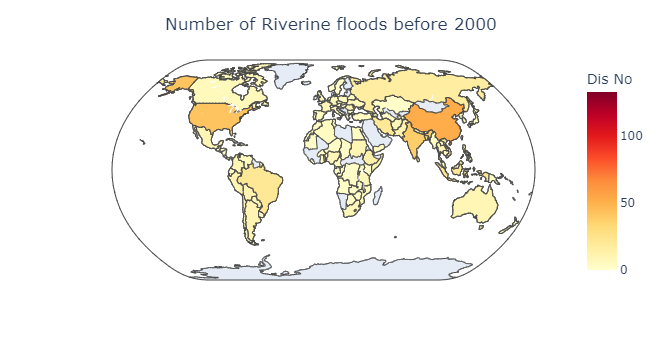

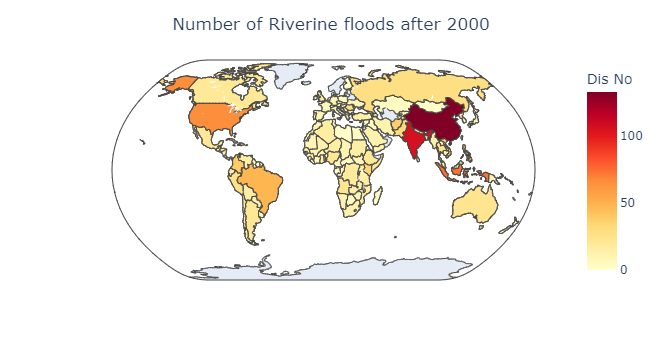

In [15]:
mapping(subtype= 'Riverine flood')

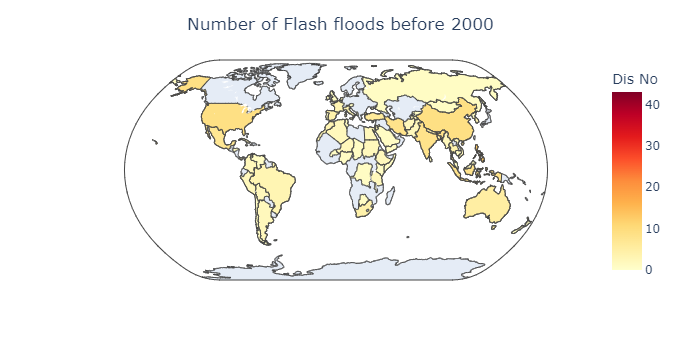

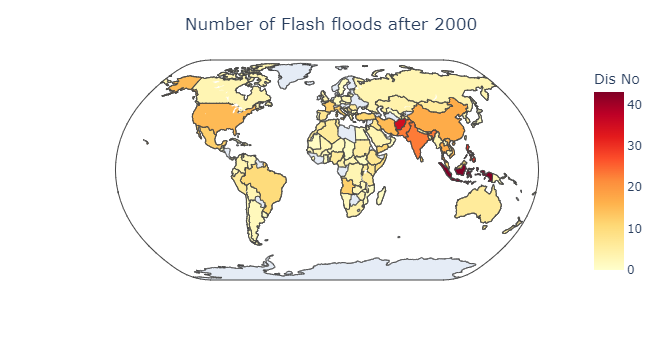

In [16]:
mapping(subtype= 'Flash flood')

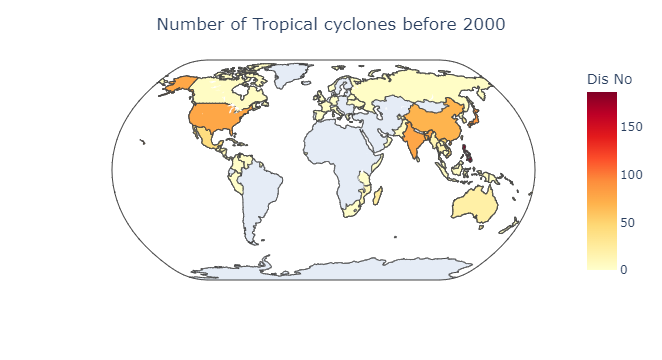

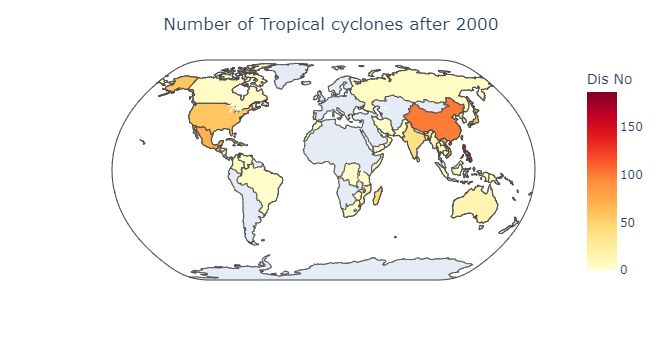

In [17]:
mapping(subtype= 'Tropical cyclone')

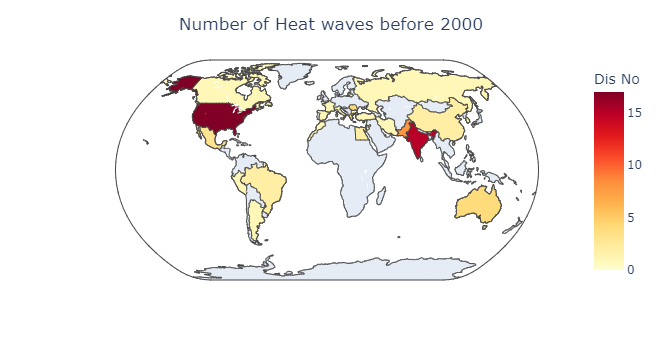

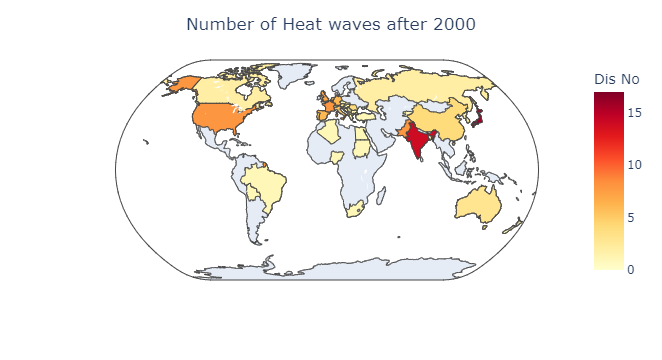

In [18]:
mapping(subtype='Heat wave')

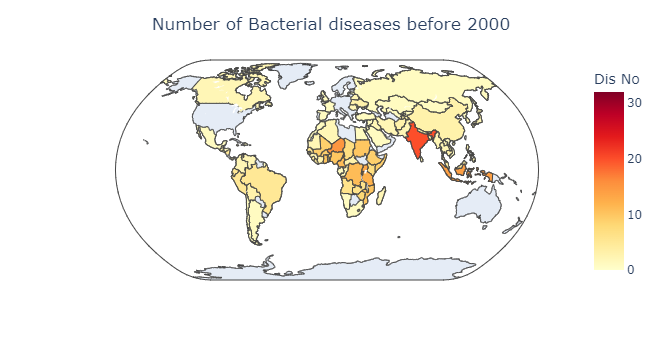

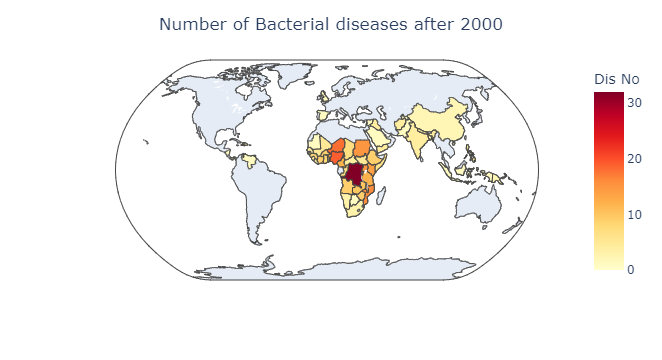

In [19]:
mapping(subtype='Bacterial disease')

In most cases it is visible that we have more frequence after 2000. One interesting odservation is that bacterial diseases were extinct in most of the world except in africa that it becomes more and more frequent. That was a first indicator about the corellation between the significance of some natural disasters and  the financial situation of a country.

# Affected poeple

## Total Deaths

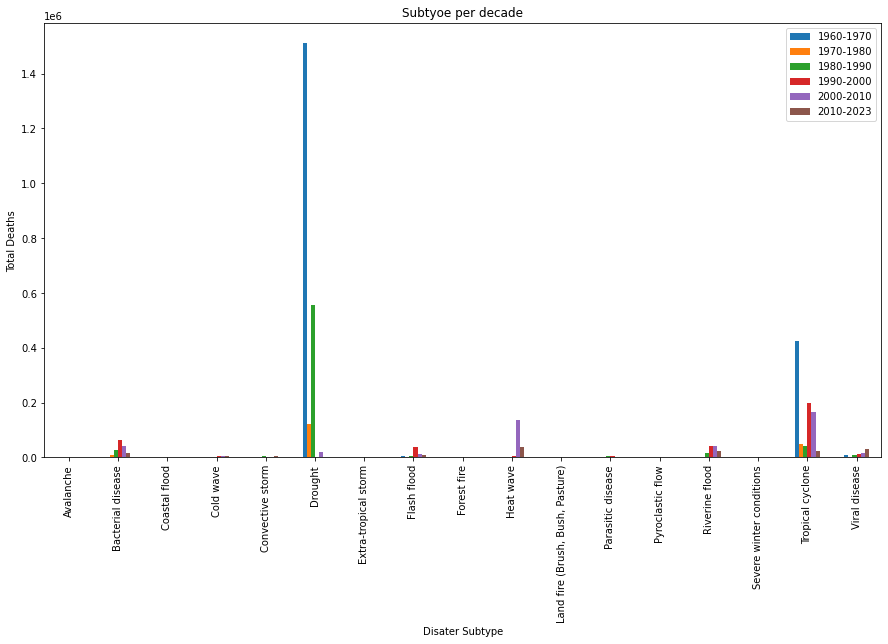

In [20]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Deaths'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('Subtyoe per decade')
plt.xlabel('Disater Subtype')
plt.ylabel('Total Deaths')
plt.show()

It seems that even though the frequency of the disasters is increased they are becoming less deadly. However the drought are deadlier but also we cannot be sure about the consistency of the data. 

### Total Affected

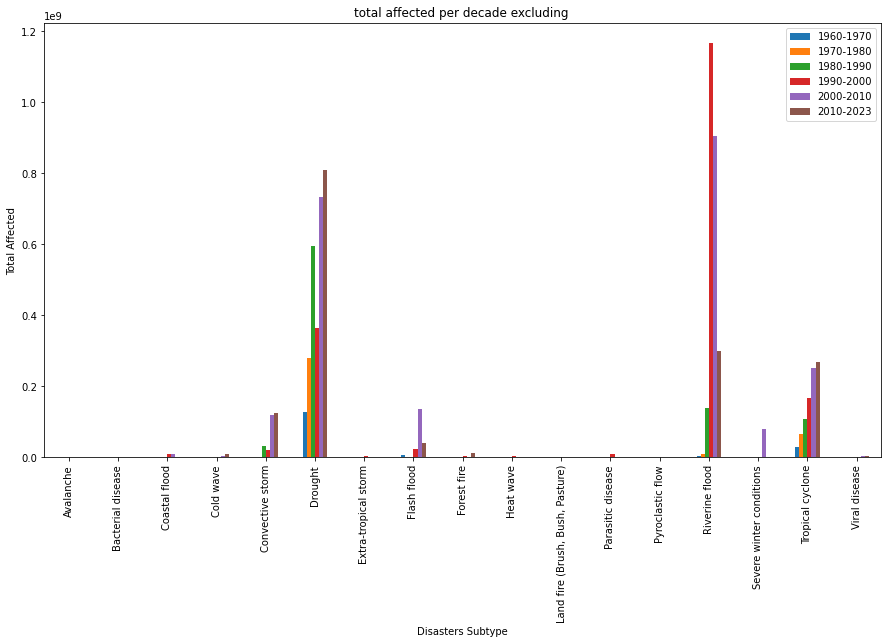

In [21]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Affected'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('total affected per decade excluding ')
plt.xlabel('Disasters Subtype')
plt.ylabel('Total Affected')
plt.show()


It seems agian that droughts and Riverine floods are the two natural disasters that are afffecting more pople even though that the are not that deadly as in the past. Therefore, we have considered to work with riverine floods. However, there riverine floods have some geographical dependency. Then we have checked the geo data that the dataset had. We had geolocation data but only from some date onwards. Also we had only name but not longtitudes and latitudes.Also sometimes the geolocations were not consistent. Sometimes they were areas some other states some other towns or cities. Furtheremore, reverine floods as their name indicates are depending on close riveres wihich is geographicaly dependent. We have considered that financial factor are affecting more the population during a drought. At last riverine floods are affecting poeple in a decreasing way the last three decades in contrast with droughts.

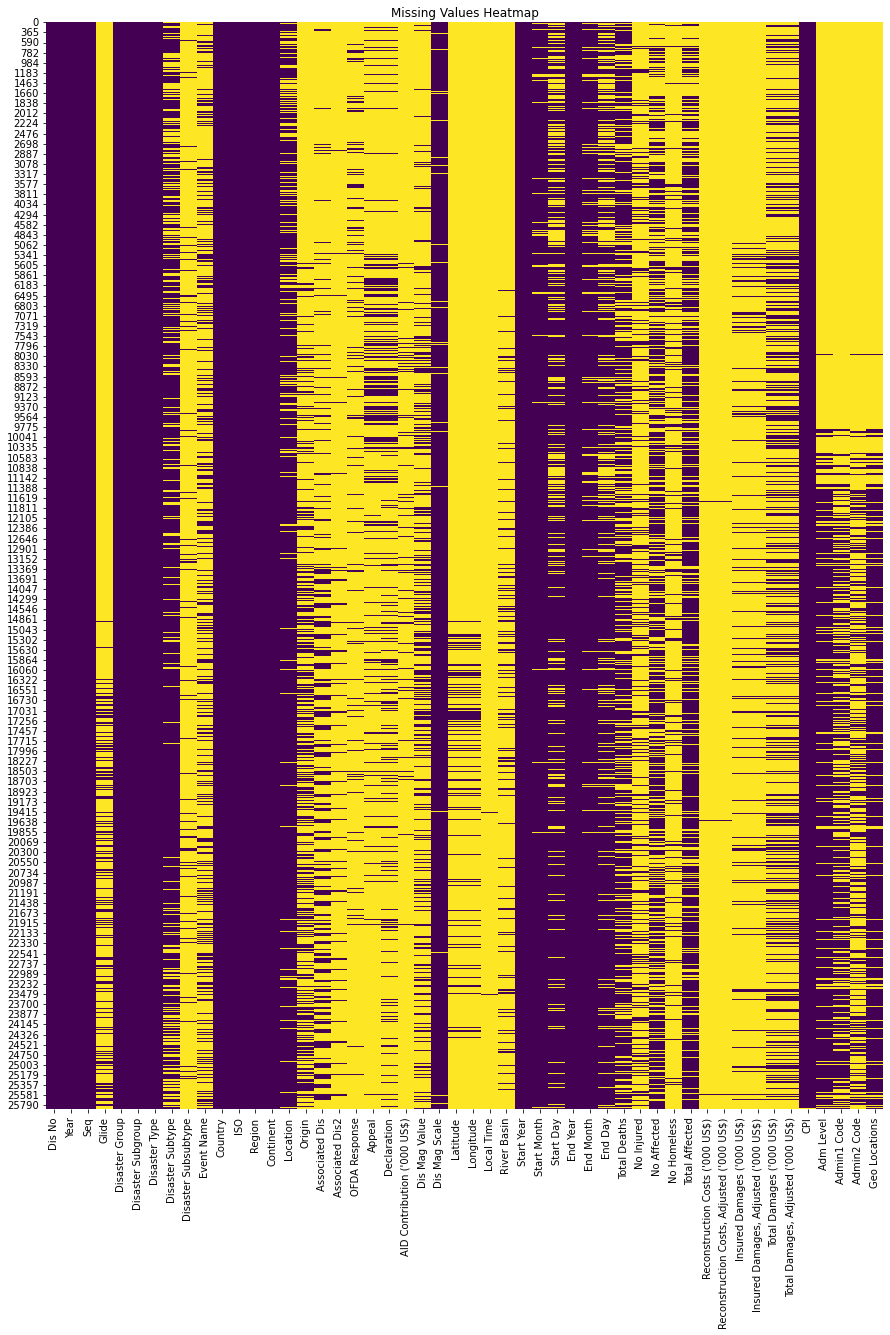

In [22]:

mask = Natural_Disasters.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


We have concluded that we will use The total affected, region, year, and iso combined with financial data.

### Interactive visualizations

Creating a bokeh barblots in a decade division of time for the six natural disaster subtypes that visualy seem that are afffecting the most poeple.

In [23]:
Disaster_Country_Affected= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum()

In [25]:
Disaster_Country_Affected_Year_ind= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum().reset_index()

# Chosing only the natural disasters that we are more interested.
chosen_categories = ["Drought", "Riverine flood","Tropical cyclone", "Flash flood", "Convective storm", "Severe winter conditions","Forest fire"]
filtered_df = Disaster_Country_Affected_Year_ind[Disaster_Country_Affected_Year_ind['Disaster Subtype'].isin(chosen_categories)]
# Assigning each year to a time period by creating a time period column
filtered_df['Time period'] = '0'
filtered_df.loc[filtered_df['Year']<=1910,'Time period'] = '1900-1910'
filtered_df.loc[(filtered_df['Year']>1910)&(filtered_df['Year']<=1920),'Time period'] = '1910-1920'
filtered_df.loc[(filtered_df['Year']>1920)&(filtered_df['Year']<=1930),'Time period'] = '1920-1930'
filtered_df.loc[(filtered_df['Year']>1930)&(filtered_df['Year']<=1940),'Time period'] = '1930-1940'
filtered_df.loc[(filtered_df['Year']>1940)&(filtered_df['Year']<=1950),'Time period'] = '1940-1950'
filtered_df.loc[(filtered_df['Year']>1950)&(filtered_df['Year']<=1960),'Time period'] = '1950-1960'
filtered_df.loc[(filtered_df['Year']>1960)&(filtered_df['Year']<=1970),'Time period'] = '1960-1970'
filtered_df.loc[(filtered_df['Year']>1970)&(filtered_df['Year']<=1980),'Time period'] = '1970-1980'
filtered_df.loc[(filtered_df['Year']>1980)&(filtered_df['Year']<=1990),'Time period'] = '1980-1990'
filtered_df.loc[(filtered_df['Year']>1990)&(filtered_df['Year']<=2000),'Time period'] = '1990-2000'
filtered_df.loc[(filtered_df['Year']>2000)&(filtered_df['Year']<=2010),'Time period'] = '2000-2010'
filtered_df.loc[(filtered_df['Year']>2010),'Time period'] = '2010<'
# Summing in regards to time period
Disaters_per_period = filtered_df.groupby(['Disaster Subtype','Time period'])['Total Affected'].sum().reset_index()
Affected_Disaster = Disaters_per_period.pivot(index='Time period', columns='Disaster Subtype', values='Total Affected')
Affected_Disaster = Affected_Disaster.fillna(0)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

C:\Users\asmun\AppData\Local\Temp\ipykernel_34572\2247632396.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
from scipy import stats
from bokeh.models import FactorRange,ColumnDataSource, Dropdown
from bokeh.plotting import figure, show

#Affected_Disaster = Affected_Disaster / Affected_Disaster.max()
Decades = ['1900-1910','1910-1920','1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010<']
disaster = ["Drought", "Riverine flood","Tropical cyclone", "Flash flood", "Convective storm", "Severe winter conditions","Forest fire"]
source = ColumnDataSource(Affected_Disaster)
p = figure(title='Number of affected poeple per rime period',x_axis_label='decade',y_axis_label='#Affected', plot_width=1200, plot_height=800,x_range = FactorRange(factors=Decades)) 

In [27]:
len(disaster)
colorcrime = ['yellow','red','blue','green','purple','brown','#00ffff','#66ff66','#9933ff','#ff0080','#99ccff','#669900','#ff6600','#660033']

In [28]:
bar ={} # to store vbars
### here we will do a for loop:

items = [] ### for the custom legend // you need to figure out where to add it

for indx,i in enumerate(disaster):
    bar[i] = p.vbar(x='Time period',  top=i, source= Affected_Disaster, 
                     fill_color=colorcrime[indx], line_color='black', fill_alpha=0.3,
                    ### we will create a vbar for each focuscrime
                      muted_alpha=0, muted =  False if i == "Drought"else True) 
    items.append((i, [bar[i]])) ### figure where to add it
print(bar)
#i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
#read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)

{'Drought': GlyphRenderer(id='1040', ...), 'Riverine flood': GlyphRenderer(id='1047', ...), 'Tropical cyclone': GlyphRenderer(id='1054', ...), 'Flash flood': GlyphRenderer(id='1061', ...), 'Convective storm': GlyphRenderer(id='1068', ...), 'Severe winter conditions': GlyphRenderer(id='1075', ...), 'Forest fire': GlyphRenderer(id='1082', ...)}


In [29]:
from bokeh.models import Legend

legend = Legend(items=items, location=(0, 400))

In [30]:

p.add_layout(legend, 'right')
p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
show(p) #displays your plot

### Creating interacive maps 

creating interactive maps that have the cumulative sum of affected poeple before and after a chose year by using a seperate slider.

In [31]:
Disaster_Country_Affected_Year_indexed= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum().reset_index()

Disaster_Country_Affected_Year_indexed = Disaster_Country_Affected_Year_indexed[(Disaster_Country_Affected_Year_indexed['Disaster Subtype']=='Heat wave')|(Disaster_Country_Affected_Year_indexed['Disaster Subtype']=='Drought')]
Disaster_Country_Affected_Year_indexed= Disaster_Country_Affected_Year_indexed.groupby(['ISO','Year'])['Total Affected'].sum().reset_index()

In [32]:

# get the full range of years
year_range = pd.date_range(str(1900), str(2023), freq='YS').year

# create a new dataframe with all category-year combinations
new_df = pd.DataFrame({'ISO': [], 'Year': []})
for ISO in Disaster_Country_Affected_Year_indexed['ISO'].unique():
    category_df = pd.DataFrame({'ISO': [ISO ] * len(year_range), 'Year': year_range})
    new_df = pd.concat([new_df, category_df])

# merge the new dataframe with the original dataframe
df_merged = pd.merge(new_df, Disaster_Country_Affected_Year_indexed, on=['ISO', 'Year'], how='left')

# sort the merged dataframe
df_merged = df_merged.sort_values(['ISO', 'Year'])

df_merged['Year'] = df_merged['Year'].astype(int)

In [33]:
df_merged=df_merged.fillna(0)
df_merged['Before'] = df_merged.groupby('ISO')['Total Affected'].cumsum()

In [34]:
pd.set_option('display.max_rows', None)

max_values = df_merged.groupby('ISO')['Before'].transform(max)

# Create a new column with the difference between each value and the maximum for its category
df_merged['After'] = max_values - df_merged['Before']

# Display the updated DataFrame



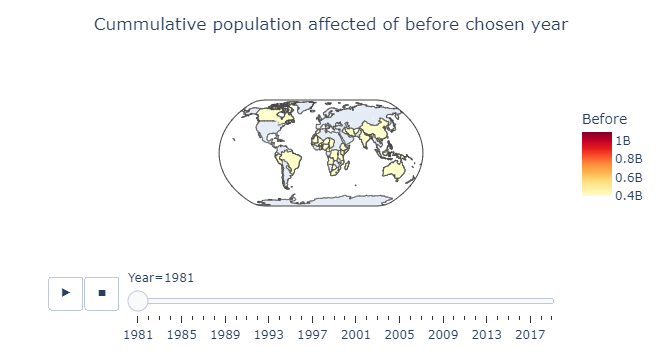

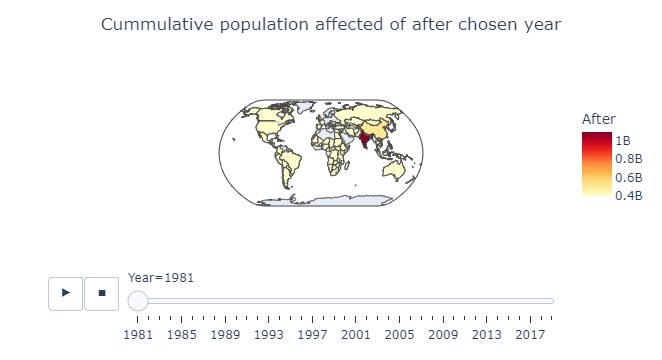

In [35]:

df_merged[df_merged == 0] = np.nan

df_used=df_merged[(df_merged['Year']>1980)&(df_merged['Year']<2020)]

fig = px.choropleth(data_frame=df_used,
                    locations="ISO",
                    scope='world',
                    color="Before",
                    hover_name="ISO",
                    color_continuous_scale = 'YlOrRd',
                    animation_frame="Year",
                    projection="natural earth",
                    range_color=[400000000, df_used['After'].max()],
                    title="GDP per Capita by Country")

fig.update_layout(
title={
     'text': 'Cummulative population affected of before chosen year',
     'y':0.95,
     'x':0.5,
     'xanchor': 'center',
     'yanchor': 'top'
}
)

# Show the figure
fig.show()

fig = px.choropleth(data_frame=df_used,
                    locations="ISO",
                    scope='world',
                    color="After",
                    hover_name="ISO",
                    color_continuous_scale = 'YlOrRd',
                    animation_frame="Year",
                    projection="natural earth",
                    range_color=[400000000, df_used['After'].max()],
                    title="GDP per Capita by Country")

fig.update_layout(
title={
     'text': 'Cummulative population affected of after chosen year',
     'y':0.95,
     'x':0.5,
     'xanchor': 'center',
     'yanchor': 'top'
}
)

# Show the figure
fig.show()

### Combining the Natural Disaster Dataset with Financial data and energy consumption data.

We have decided that is is important to limit out analysis to the last trhee decades so from 1990.

In [36]:

Natural_Disasters_Subtype = Natural_Disasters[(Natural_Disasters['Disaster Subtype']=='Drought')|(Natural_Disasters['Disaster Subtype']=='Heat wave')]
Natural_Disasters_Subtype_After_1990 =Natural_Disasters_Subtype[Natural_Disasters_Subtype['Year']>1990]
Natural_Disasters_Scope = Natural_Disasters_Subtype_After_1990[["Dis No",'Year','Disaster Subtype','Country', 'ISO', 'Region', 'Continent', 'Total Deaths',
        'No Injured', 'No Affected', 'No Homeless', 'Total Affected',"Total Damages ('000 US$)","Reconstruction Costs ('000 US$)"]]

There are lines to the dataset that have number of deaths and number of affected but nottotal affected. We have decide to get the sum of the lines in order to have more data to work with.

In [37]:
Natural_Temp = Natural_Disasters_Scope
Temp1 = Natural_Disasters_Scope

# creates a new line that has the sum of 'Total Deaths','No Injured', 'No Homeless' if total affected is null
Temp1['New Affected'] = Temp1.loc[ Temp1['Total Affected'].isnull(),[ 'Total Deaths','No Injured', 'No Homeless']].sum(axis=1)
# convert zero values to nan
Temp1.loc[Temp1['New Affected'] <= 0, 'New Affected'] = np.nan
# fill total affected nan values with new affected values
Temp1.loc[Temp1['Total Affected'].isnull(), 'Total Affected'] = Temp1.loc[Temp1['Total Affected'].isnull(), 'New Affected']


C:\Users\asmun\AppData\Local\Temp\ipykernel_34572\1871077039.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
Temp1 = Temp1.drop(['New Affected','No Injured','No Homeless',"Total Damages ('000 US$)","Reconstruction Costs ('000 US$)"], axis=1)

Natural_Disasters_Scope = Temp1

instances = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Dis No'].count().reset_index()

Total_affected = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Total Affected'].sum().reset_index()

Total_deaths = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Total Deaths'].sum().reset_index()
Natural_Disasters_Scope =  pd.merge(instances,Total_deaths, on =['ISO','Year','Disaster Subtype', 'Region', 'Continent'])
Natural_Disasters_Scope =  pd.merge(Natural_Disasters_Scope,Total_affected, on =['ISO','Year','Disaster Subtype', 'Region', 'Continent'])

filtr = Natural_Disasters_Scope['ISO'].unique()


### importing energy consumption dataset

In [39]:
energy_consumption = pd.read_csv('primary-energy-cons.csv')
energy_consumption = energy_consumption[energy_consumption['Year']>1990 ] 
energy_consumption['ISO']=energy_consumption['Code']

In [40]:
GDP_absolut = pd.read_excel('GDP_absolut.xls')

### Importing the rest of the datasets

We have created a function to automate the extraction and the manipulation of the world bank odtain such a way that it will be easy to merge them with the natural disasters dataand the enexrgy consumption one. 

In [41]:
def data_clean(name = 'GDP_per_capita'):

    GDP_per_capita_raw = pd.read_excel(name + '.xls')
    GDP_per_capita_raw.drop(['Unnamed: 2','Unnamed: 3',], axis='columns', inplace=True)
    GDP_per_capita_raw.drop([0,1], axis='rows', inplace=True)
    GDP_per_capita_renamed = GDP_per_capita_raw
    GDP_per_capita_renamed.columns = GDP_per_capita_renamed.iloc[0]
    GDP_per_capita_renamed.drop([2], axis='rows', inplace=True)
    GDP_per_capita = GDP_per_capita_renamed.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name=name)
    GDP_per_capita['Year'] = GDP_per_capita['Year'].astype(int)
    final = GDP_per_capita[GDP_per_capita["Year"]>1990]
    return final

In [42]:
GDP_per_capita = data_clean(name = 'GDP_per_capita')
GDP_absolut = data_clean(name = 'GDP_absolut')
GDP_agriculture = data_clean(name = 'GDP_agriculture')
GDP_exports = data_clean(name = 'GDP_exports')
GDP_industry = data_clean(name = 'GDP_industry')
Imports_percent_GDP = data_clean(name = 'Imports_percent_GDP')
Cerial_Yields = data_clean(name = 'Cerial_Yields')
Annua_freshwater_withdrawal_total = data_clean(name = 'Annua_freshwater_withdrawal_total')
Agriculture_irrigated_Land = data_clean(name = 'Agriculture_irrigated_Land')
Agricultural_Land = data_clean(name = 'Agricultural_Land')
Arable_Land_Percentage = data_clean(name = 'Arable_Land_Percentage')
income_1_of_the_highest_fifth = data_clean(name = 'income_1_of_the_highest_20%')
income_2_of_the_second_fifth = data_clean(name = 'income_2_of_the_second_20%')
income_3_of_the_third_fifth = data_clean(name = 'income_3_of_the_third_20%')
income_4_of_the_fourth_fifth = data_clean(name = 'income_4_of_the_fourth_20%')
income_5_of_the_lowest_fifth = data_clean(name = 'income_5_of_the_lowest_20%')
Poverty_headcount_ratio = data_clean(name = 'Poverty_headcount_ratio')

# meging the data together
Financial_Dataset = pd.merge(GDP_per_capita,Cerial_Yields, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_absolut, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_agriculture, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_exports, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_industry, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Imports_percent_GDP, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Annua_freshwater_withdrawal_total, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Agriculture_irrigated_Land, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Agricultural_Land , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Arable_Land_Percentage , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_1_of_the_highest_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_2_of_the_second_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_3_of_the_third_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_4_of_the_fourth_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_5_of_the_lowest_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Poverty_headcount_ratio , on =['Country Name','Country Code','Year'])



Then we want to filter the data of the world bank in such a way that we get only data from countries that are included in the data we have from the previously created dataframe ( Natural_Disasters_Scope ) which has data of droughts and heat waves after l990. We achieve that with the following code.

In [43]:
filtr = Natural_Disasters_Scope['ISO'].unique()
Financial_Dataset = Financial_Dataset.loc[Financial_Dataset['Country Code'].isin(filtr)]

Then we have checked the nul values in that dataframe.

In [44]:

FD = Financial_Dataset
mask = FD.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()



"\nFD = Financial_Dataset\nmask = FD.isnull()\n\n\nplt.figure(figsize=(15, 20))\n\n\n# Create a heatmap of missing values\nsns.heatmap(mask, cmap='viridis', cbar=False)\nplt.title('Missing Values Heatmap')\nplt.show()\n"

it seems that data regarding irrigated land are not good and should be excluded. Also the data that have to do with difference in income and poverty are not so consistent so we need to see if we will include them or not. 

The we have erged the two dataframes

In [45]:
# Creating a renamed column that hase the name 'ISO' in order to make is easier to merge with NAtural Disasters
Financial_Dataset['ISO']= Financial_Dataset['Country Code']
Temp_matrix = pd.merge(Financial_Dataset,Natural_Disasters_Scope, on =['ISO','Year'])
Temp_matrix = Temp_matrix.replace(0,np.nan)

Then we have checked again using heatmap the misssing data ratio

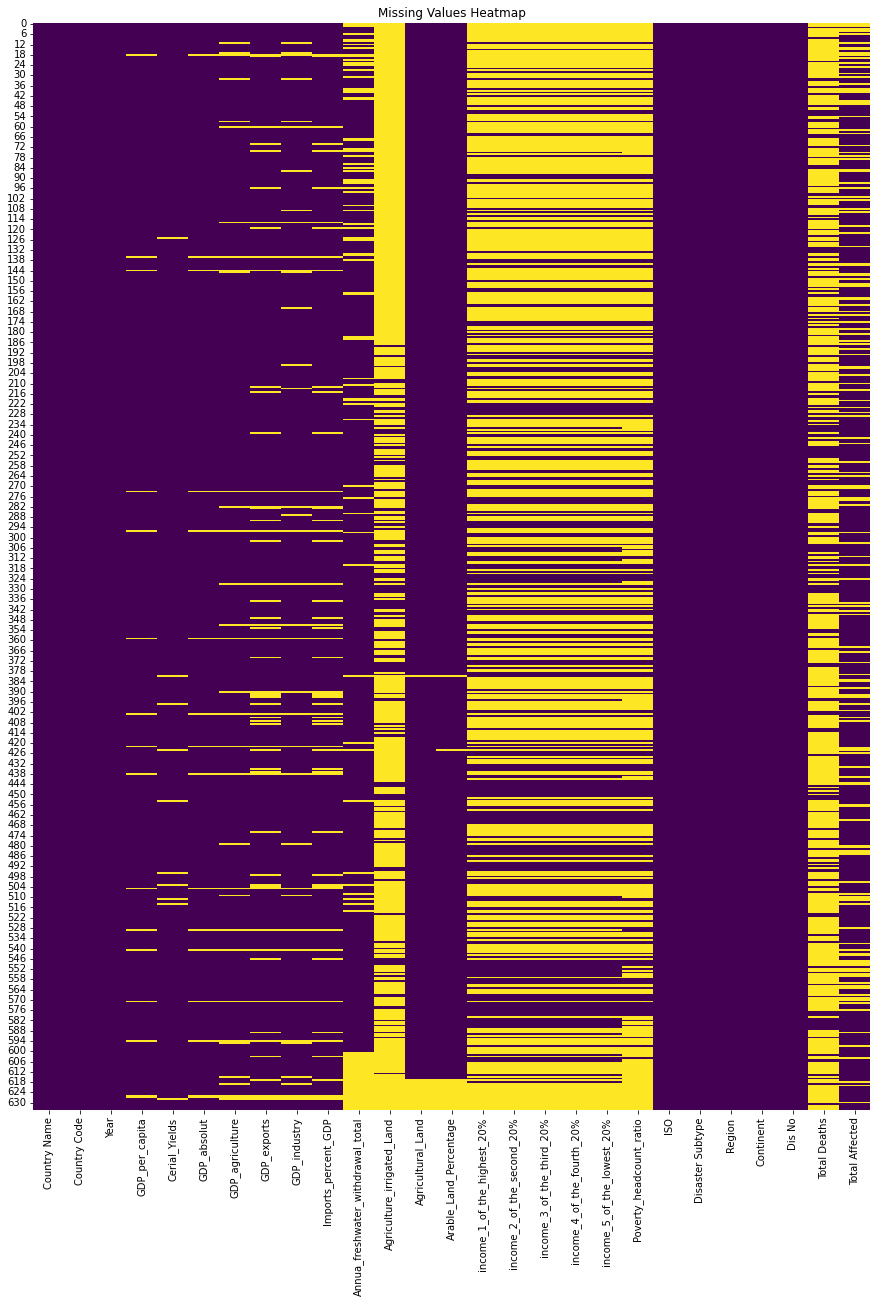

In [106]:

FD = Temp_matrix
mask = FD.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


Then we have dropped the Aggriculture irigated land and counted the lines with not nan values like that or after we have removed the poverty data, the Total Deaths data, and the insome data.

In [47]:
Death_dataset = Temp_matrix.drop(['Agriculture_irrigated_Land'], axis=1)
Death_dataset = Death_dataset.dropna()
len(Death_dataset)


71

In [48]:
Death_dataset_Ex_Poverty = Temp_matrix.drop(['Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)
Death_dataset_Ex_Poverty = Death_dataset_Ex_Poverty.dropna()
len(Death_dataset_Ex_Poverty)

82

It seems that by including irrigated Land and Poverty colymns we have a very small dataset so we have decided to exclude these two columns.

In [49]:
Affected_dataset = Temp_matrix.drop(["Total Deaths",'Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)


In [50]:
len(Affected_dataset)

635

In [51]:
"""
Instances = Temp_matrix.drop(["Total Affected","Total Deaths",'Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)
Instances = Instances.dropna()
len(Instances)
"""

'\nInstances = Temp_matrix.drop(["Total Affected","Total Deaths",\'Agriculture_irrigated_Land\',\'Poverty_headcount_ratio\'], axis=1)\nInstances = Instances.dropna()\nlen(Instances)\n'

It seems that more data could be excluded but we have considered that 217 lines were good enough to work with but if could not create a good enough prediction model we could check if by excluding also the income data we could get a better accuracy

## Analysis on Affected dataset

In [52]:
Affected_dataset['Population'] = Affected_dataset['GDP_absolut']/Affected_dataset['GDP_per_capita']
Affected_dataset['Total Affected normalized'] = Affected_dataset['Total Affected']/Affected_dataset['Population']

Creating region data that correspond to contintents

In [53]:
Affected_dataset.loc[Affected_dataset['Region']=='Southern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Western Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Northern Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Southern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='South-Eastern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='South America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Southern America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Northern America','Region'] ='Northern America'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Western Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Central Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Central America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Western Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Northern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Southern Africa','Region'] ='Africa'

creatilng the colouring of these regions. Green for Asia, blue for Africa red for North America, Purple for latin/south America yellow for Europe Orange for Australia and New Zealand

In [54]:

colours = {'Asia' : 'green', 'Africa':'blue', 'Northern America': 'red', 'South America':'purple', 'Europe':'yellow','Australia and New Zealand':'orange'}
clrs = ['green','blue', 'red', 'purple', 'yellow','orange']

In [55]:

Affected_dataset_messy = Affected_dataset
Affected_dataset = Affected_dataset.dropna()

Check how many distinct rows we have per country after the combination and cleansing.

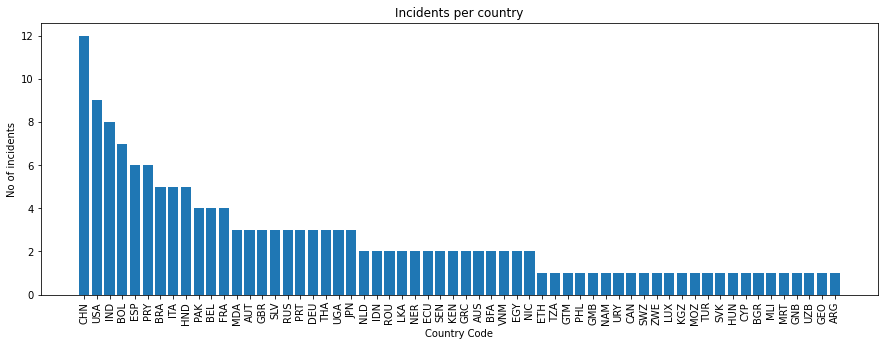

In [56]:
Countries = Affected_dataset['ISO'].value_counts()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Incidents per country')
plt.xlabel('Country Code')
plt.ylabel('No of incidents')

plt.show()

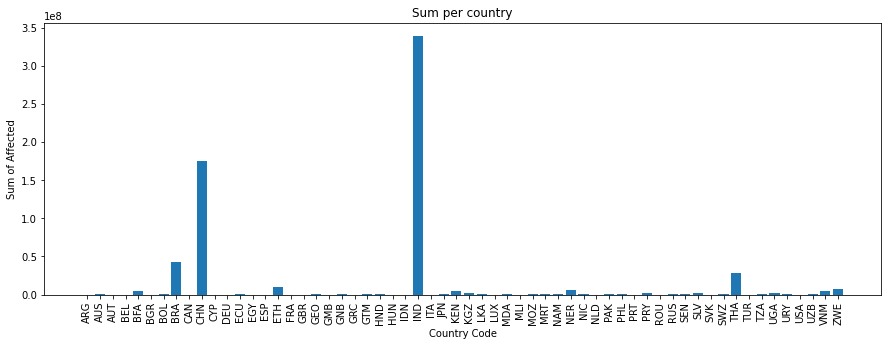

In [57]:
Countries = Affected_dataset.groupby('ISO')['Total Affected'].sum()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Sum per country')
plt.xlabel('Country Code')
plt.ylabel('Sum of Affected')

plt.show()

It seems that by beacause of their population china and India have more affected poeple such that they might be outliers. However, we have a normalized version oth the number of affected poeple divided by the poplutaion. In the 

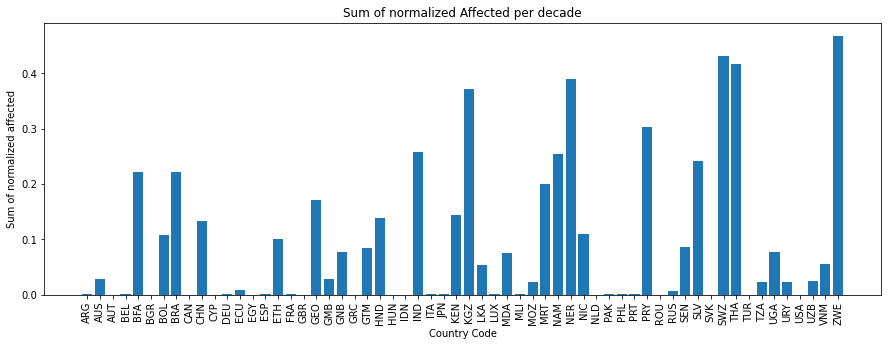

In [58]:
Countries = Affected_dataset.groupby('ISO')['Total Affected normalized'].sum()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Sum of normalized Affected per decade')
plt.xlabel('Country Code')
plt.ylabel('Sum of normalized affected')

plt.show()

the above is the sum of the normalized versions. However it might be more appropriate to get the mean of the affected poeple per incident.

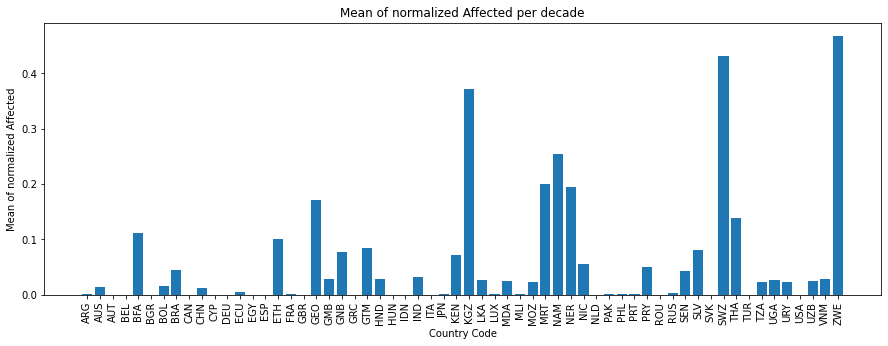

In [59]:
Countries = Affected_dataset.groupby('ISO')['Total Affected normalized'].mean()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Mean of normalized Affected per decade')
plt.xlabel('Country Code')
plt.ylabel('Mean of normalized Affected')

plt.show()

### 2.1.1 GDP per captia for all of the countries in the right form, 

In [7]:
# Drop the first 3 rows of the DataFrame
Countries_GDPC = Countries_GDPC.drop([0, 1])

# Set the 4th row as the column index
Countries_GDPC.columns = Countries_GDPC.iloc[0]
Countries_GDPC = Countries_GDPC.drop(Countries_GDPC.index[0])

Countries_GDPC.index = Countries_GDPC.index.astype(int)
Countries_GDPC = Countries_GDPC.reset_index(drop=True)

Countries_GDPC = Countries_GDPC.drop('Indicator Name', axis=1)
Countries_GDPC = Countries_GDPC.drop('Indicator Code', axis=1)

Rename the year columns


In [8]:

old_names = list(Countries_GDPC.columns)
old_names = old_names[2:]


In [9]:
new_names = [str(year) for year in range(1960, 2022)]
name_map = dict(zip(old_names, new_names))

In [10]:
Countries_GDPC = Countries_GDPC.rename(columns=name_map)

In [11]:
Countries_GDPC = Countries_GDPC.drop('Country Name', axis=1)

Now we convert the dataset from having the years as columns to only having one column to indicate the years

In [12]:
df_melted = Countries_GDPC.melt(id_vars=['Country Code'], var_name='year', value_name='GDPC')
df_melted= df_melted.rename(columns={'Country Code': 'ISO','year':'Year'})

Now lest do the same for the population data

In [13]:
# Drop the first 2 rows of the DataFrame
population = population.drop([0, 1])

# Set the 4th row as the column index
population.columns = population.iloc[0]
population = population.drop(population.index[0])

population.index = population.index.astype(int)
population = population.reset_index(drop=True)
population = population.drop('Indicator Name', axis=1)
population = population.drop('Indicator Code', axis=1)

In [14]:
old_names = list(population.columns)
old_names = old_names[2:]

In [15]:
new_names = [str(year) for year in range(1960, 2022)]
name_map = dict(zip(old_names, new_names))

In [16]:
population = population.rename(columns=name_map)
population = population.drop('Country Name', axis=1)

In [17]:
df_melted_pop = population.melt(id_vars=['Country Code'], var_name='year', value_name='population')
df_melted_pop= df_melted_pop.rename(columns={'Country Code': 'ISO','year':'Year'})

### Let's now merge the natural disaster dataset with data about countries GDP per capita and population.

In [18]:
NDdf = Natural_Disasters[['Dis No', 'Country','ISO', 'Region', 'Continent','Year','Total Deaths', 'Total Affected',
       "Total Damages ('000 US$)"]]

In [19]:
#NDdf = NDdf[NDdf['Year'] >= 1973]

In [20]:
ISO_Region_Continent = NDdf[['Country','ISO', 'Region', 'Continent']]
ISO_Region_Continent = ISO_Region_Continent.groupby(['ISO']).first().reset_index()
NDdf_Country = NDdf.groupby(['ISO','Year']).sum()

In [21]:
df_melted['Year'] = df_melted['Year'].astype('int64')
df_melted_pop['Year'] = df_melted_pop['Year'].astype('int64')

In [22]:
ND_GDPC_Country = pd.merge(NDdf_Country, df_melted, on=['ISO','Year'])

In [23]:
ND_GDPC_Country = pd.merge(ND_GDPC_Country , df_melted_pop, on=['ISO','Year'])

In [24]:
ND_GDPC = pd.merge(ND_GDPC_Country, ISO_Region_Continent, on=['ISO'])

## 3. Data Analysis

### 3.1 Descrive your data analysis and explain what you've learned about the dataset 

lets plot a scatterplot of gdp per capita and normalized affected to see if there is some relationship between the variables

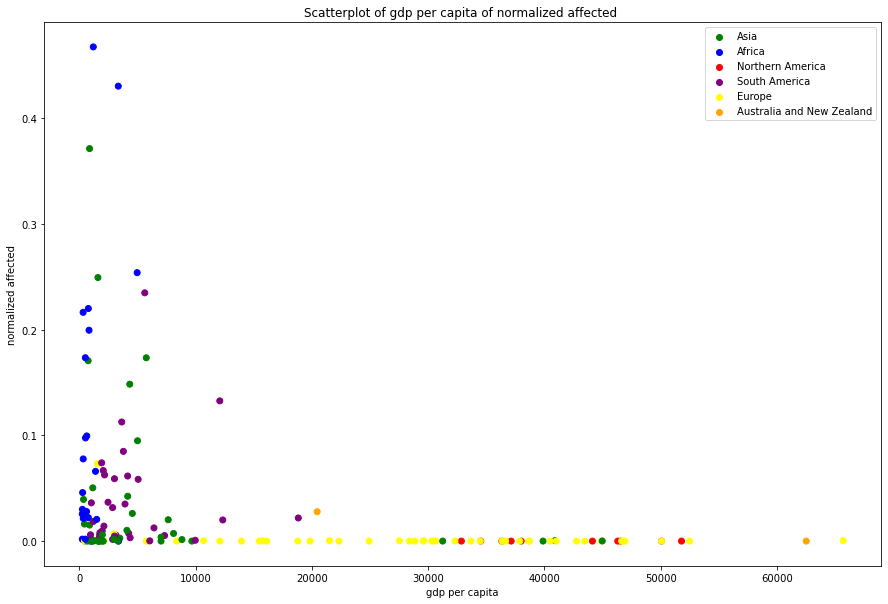

In [108]:

plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset ['GDP_per_capita'] ,Affected_dataset ['Total Affected normalized'],c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot of gdp per capita of normalized affected ')
plt.xlabel('gdp per capita')
plt.ylabel('normalized affected')

plt.show()

There does not seem to be a relationship between them, but let's take the log of both variables to see if we see some relationship there

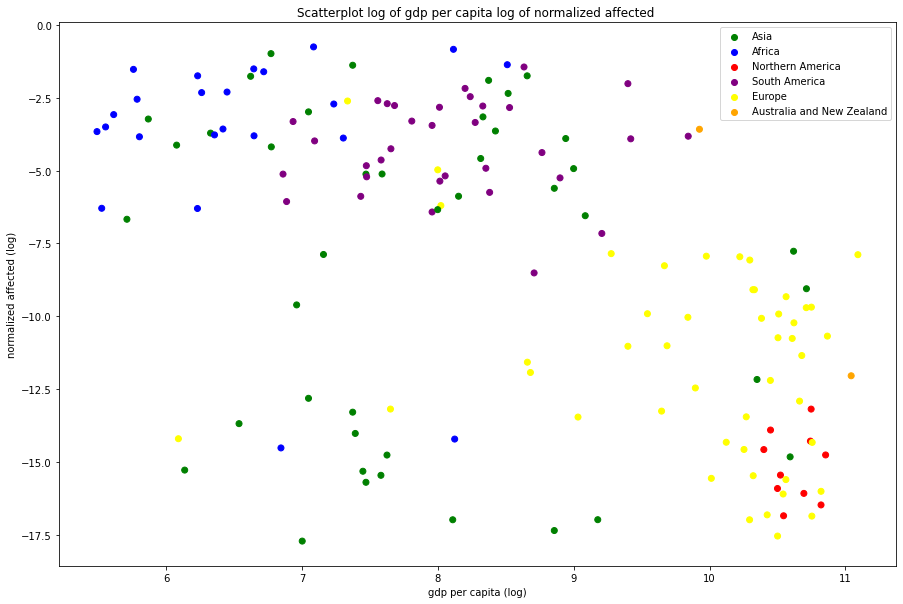

In [82]:

plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset ['GDP_per_capita'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot log of gdp per capita log of normalized affected ')
plt.xlabel('gdp per capita (log)')
plt.ylabel('normalized affected (log)')

plt.show()


It seems that there is a negative correlation between normalized affected and gdp per capita. Also, it seems that there can be formed some clusters.

C:\Users\asmun\AppData\Local\Temp\ipykernel_34572\1688550293.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\asmun\AppData\Local\Temp\ipykernel_34572\1688550293.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



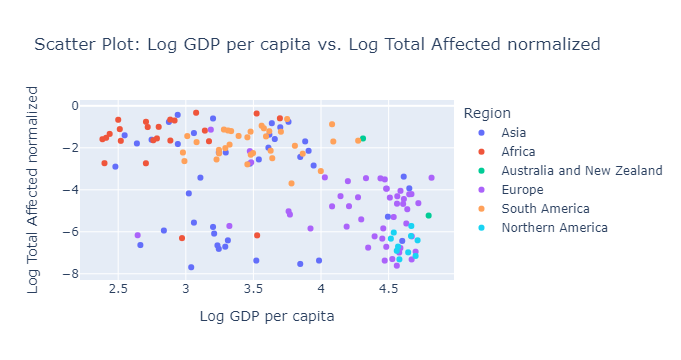

In [124]:


# Assuming you have the 'Affected_dataset' DataFrame

# Taking logarithm (base 10) of the required columns
Affected_dataset['log_GDP_per_capita'] = np.log10(Affected_dataset['GDP_per_capita'])
Affected_dataset['log_Total_Affected_normalized'] = np.log10(Affected_dataset['Total Affected normalized'])

# Creating the scatter plot using Plotly
fig = px.scatter(Affected_dataset, x='log_GDP_per_capita', y='log_Total_Affected_normalized',
                 color='Region', labels={'log_GDP_per_capita': 'Log GDP per capita',
                                         'log_Total_Affected_normalized': 'Log Total Affected normalized'},
                 title='Scatter Plot: Log GDP per capita vs. Log Total Affected normalized')

fig.show()
# Save the plot as an HTML file
fig.write_html("scatter_gdpc.html")

C:\Users\asmun\AppData\Local\Temp\ipykernel_34572\1252227135.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\asmun\AppData\Local\Temp\ipykernel_34572\1252227135.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



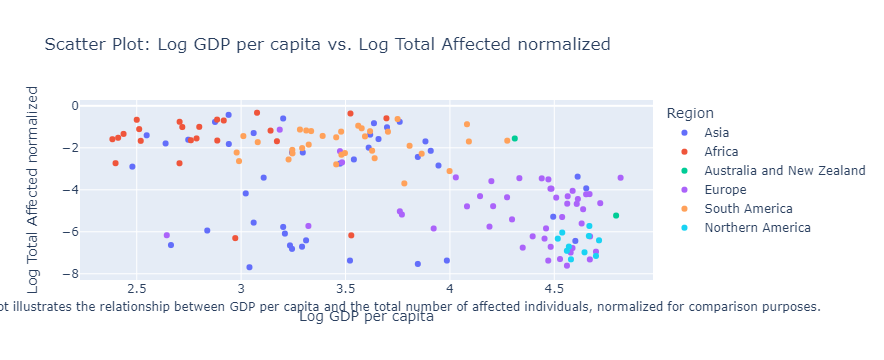

In [125]:
# Assuming you have the 'Affected_dataset' DataFrame

# Taking logarithm (base 10) of the required columns
Affected_dataset['log_GDP_per_capita'] = np.log10(Affected_dataset['GDP_per_capita'])
Affected_dataset['log_Total_Affected_normalized'] = np.log10(Affected_dataset['Total Affected normalized'])

# Creating the scatter plot using Plotly
fig = px.scatter(Affected_dataset, x='log_GDP_per_capita', y='log_Total_Affected_normalized',
                 color='Region', labels={'log_GDP_per_capita': 'Log GDP per capita',
                                         'log_Total_Affected_normalized': 'Log Total Affected normalized'},
                 title='Scatter Plot: Log GDP per capita vs. Log Total Affected normalized')

# Add figure text
fig.add_annotation(
    x=0.5,
    y=-0.20,
    xref="paper",
    yref="paper",
    text="The scatter plot illustrates the relationship between GDP per capita and the total number of affected individuals, normalized for comparison purposes.",
    showarrow=False,
    font=dict(size=12),
)

fig.write_html("scatter_plot_gdpvstotal.html")

fig.show()


In [83]:

plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_agriculture'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()


"\nplt.figure(figsize=(15,10))\nplt.scatter(np.log(Affected_dataset [ 'GDP_agriculture'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')\nplt.colorbar()\nplt.show()\n"

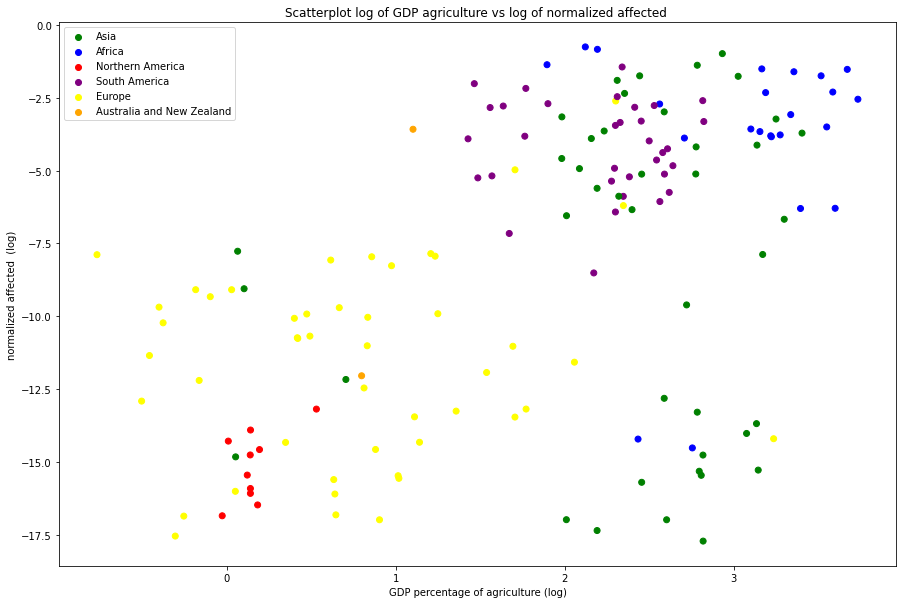

In [84]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_agriculture'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot log of GDP agriculture vs log of normalized affected ')
plt.xlabel('GDP percentage of agriculture (log)')
plt.ylabel('normalized affected  (log)')

plt.show()

It is clear that these is a positive corelation betwee the number of poeple that are affected from a drought and the percentage of gdp which id expected. Also the clustering is again visible.

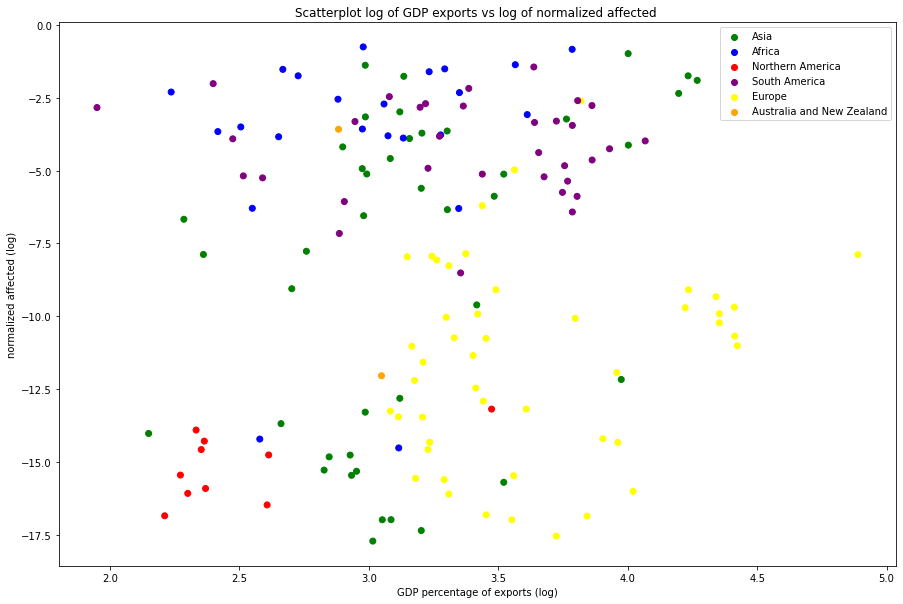

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_exports'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot log of GDP exports vs log of normalized affected ')
plt.xlabel('GDP percentage of exports (log)')
plt.ylabel('normalized affected (log)')

plt.show()

It is clear that these is a positive corelation betwee the number of poeple that are affected from a drought and the percentage of gdp which id expected. Also the clustering is again visible.

In [86]:

plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_industry'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()


"\nplt.figure(figsize=(15,10))\nplt.scatter(np.log(Affected_dataset [ 'GDP_industry'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')\nplt.colorbar()\nplt.show()\n"

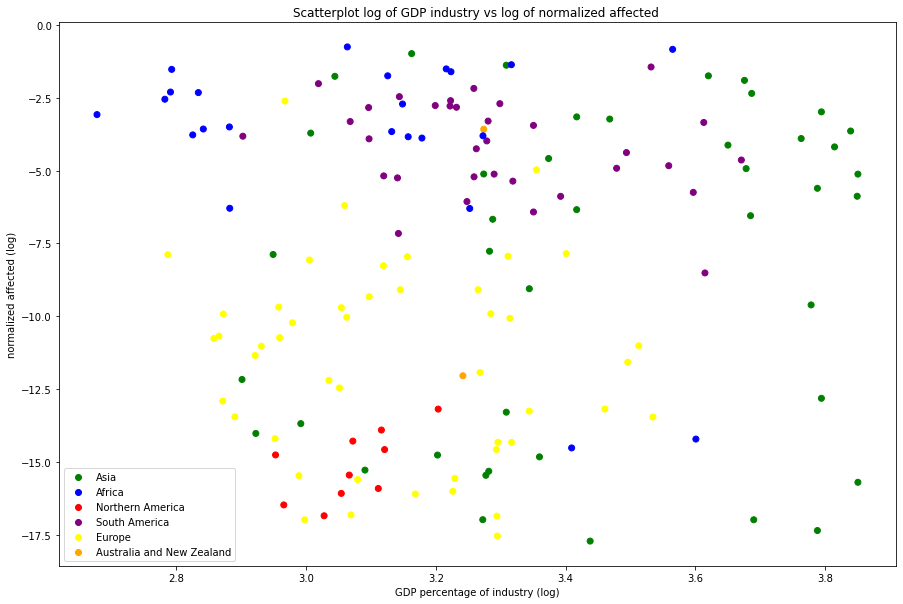

In [87]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'GDP_industry'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot log of GDP industry vs log of normalized affected ')
plt.xlabel('GDP percentage of industry (log)')
plt.ylabel('normalized affected (log)')

plt.show()

Also a correlation exists but is not so clear as before. also again the clusters are visible.

In [88]:

plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Imports_percent_GDP'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()


"\nplt.figure(figsize=(15,10))\nplt.scatter(np.log(Affected_dataset [ 'Imports_percent_GDP'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')\nplt.colorbar()\nplt.show()\n"

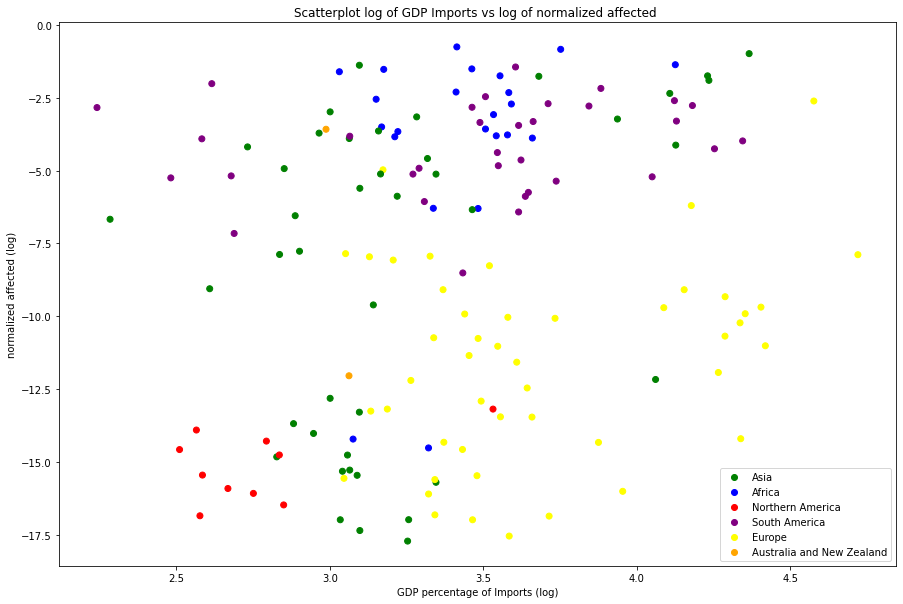

In [89]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Imports_percent_GDP'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot log of GDP Imports vs log of normalized affected ')
plt.xlabel('GDP percentage of Imports (log)')
plt.ylabel('normalized affected (log)')

plt.show()

In [90]:

plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset ['Total Affected normalized']),Affected_dataset [ 'Cerial_Yields'] ,c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()


"\nplt.figure(figsize=(15,10))\nplt.scatter(np.log(Affected_dataset ['Total Affected normalized']),Affected_dataset [ 'Cerial_Yields'] ,c = Affected_dataset['Year'],cmap ='viridis')\nplt.colorbar()\nplt.show()\n"

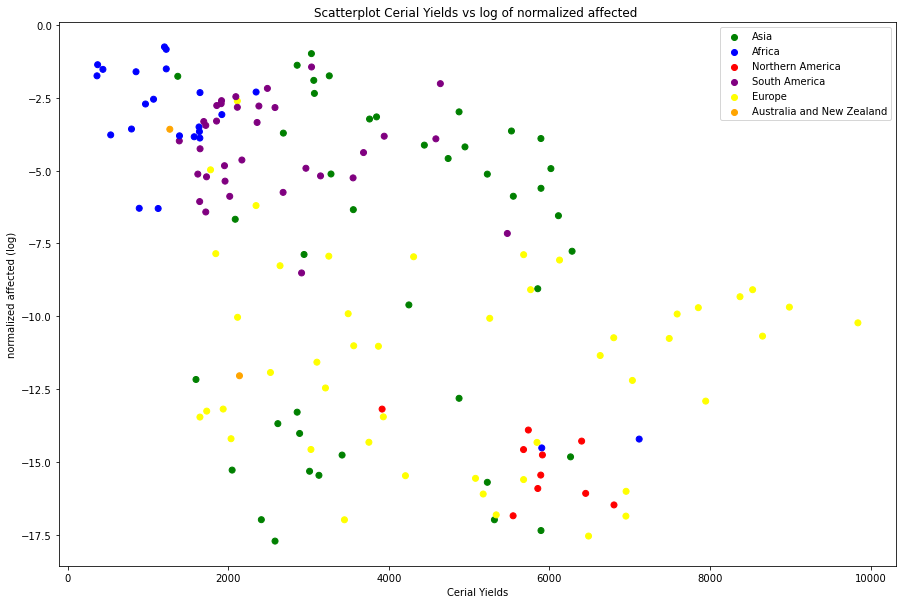

In [91]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Cerial_Yields'] ,np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot Cerial Yields vs log of normalized affected ')
plt.xlabel('Cerial Yields')
plt.ylabel('normalized affected (log)')
plt.show()

In [92]:

plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Annua_freshwater_withdrawal_total'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()


"\nplt.figure(figsize=(15,10))\nplt.scatter(np.log(Affected_dataset [ 'Annua_freshwater_withdrawal_total'] ),np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')\nplt.colorbar()\nplt.show()\n"

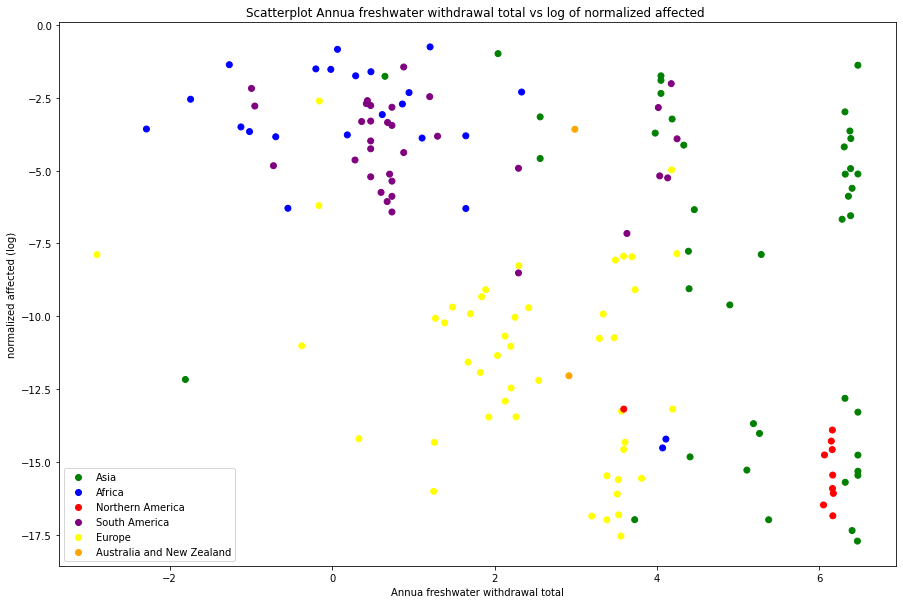

In [93]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Affected_dataset [ 'Annua_freshwater_withdrawal_total'] ),np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot Annua freshwater withdrawal total vs log of normalized affected ')
plt.xlabel('Annua freshwater withdrawal total')
plt.ylabel('normalized affected (log)')
plt.show()

In [1]:
import plotly.graph_objects as go

fig = go.Figure()

# Add the main scatter plot
fig.add_trace(go.Scatter(
    x=np.log(Affected_dataset['Annua_freshwater_withdrawal_total']),
    y=np.log(Affected_dataset['Total Affected normalized']),
    mode='markers',
    marker=dict(color=[colours[c] for c in Affected_dataset['Region']]),
    showlegend=False
))

# Add empty scatter traces for each category
for category, color in colours.items():
    fig.add_trace(go.Scatter(
        x=[],
        y=[],
        mode='markers',
        marker=dict(color=color),
        name=category
    ))

# Set layout and labels
fig.update_layout(
    title='Scatter Plot: Log Annual Freshwater Withdrawal vs. Log Total Affected Individuals (Normalized)',
    xaxis=dict(title='Log Annual Freshwater Withdrawal'),
    yaxis=dict(title='Log Total Affected Individuals (Normalized)'),
    showlegend=True,
    legend=dict(
        title='Regions'
    )
)

# Save the plot as an HTML file
fig.write_html('scatter_plot_freshTotal.html')

# Show the plot
fig.show()

NameError: name 'np' is not defined

In [94]:

plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Agricultural_Land'] ,np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')
plt.colorbar()
plt.show()


"\nplt.figure(figsize=(15,10))\nplt.scatter(Affected_dataset [ 'Agricultural_Land'] ,np.log(Affected_dataset ['Total Affected normalized']),c = Affected_dataset['Year'],cmap ='viridis')\nplt.colorbar()\nplt.show()\n"

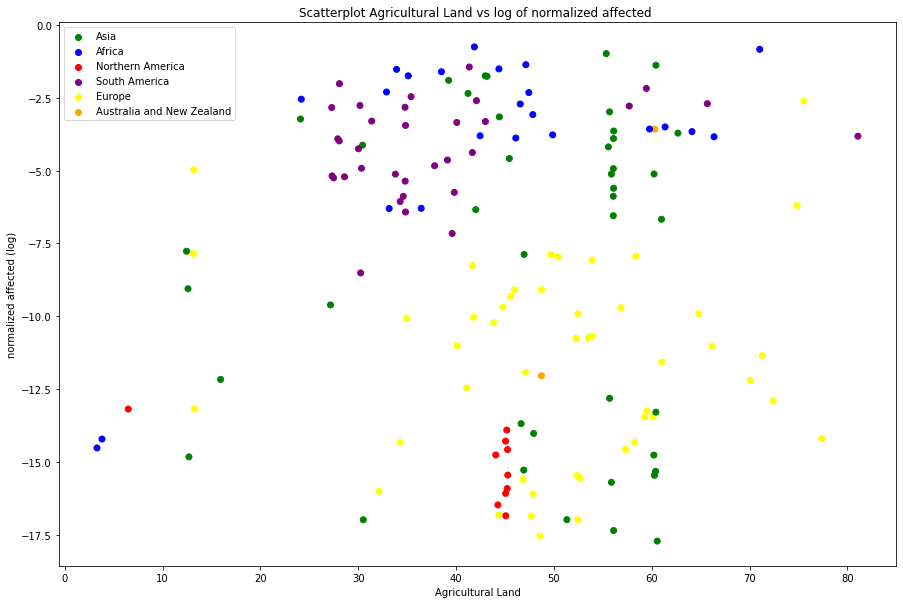

In [95]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Agricultural_Land'] ,np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)
plt.title('Scatterplot Agricultural Land vs log of normalized affected ')
plt.xlabel('Agricultural Land')
plt.ylabel('normalized affected (log)')
plt.show()

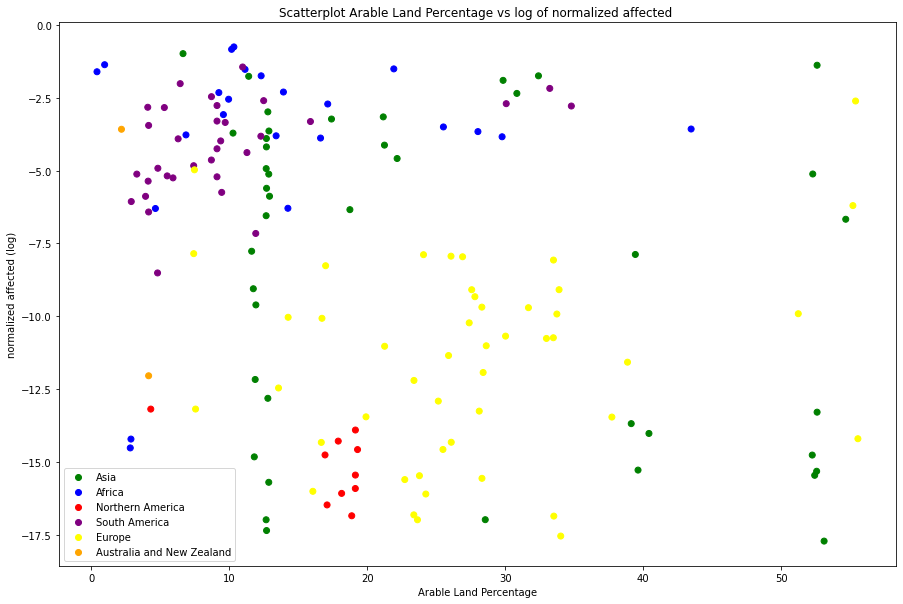

In [96]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'Arable_Land_Percentage'] ,np.log(Affected_dataset ['Total Affected normalized']),c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.title('Scatterplot Arable Land Percentage vs log of normalized affected ')
plt.xlabel('Arable Land Percentage')
plt.ylabel('normalized affected (log)')
plt.show()

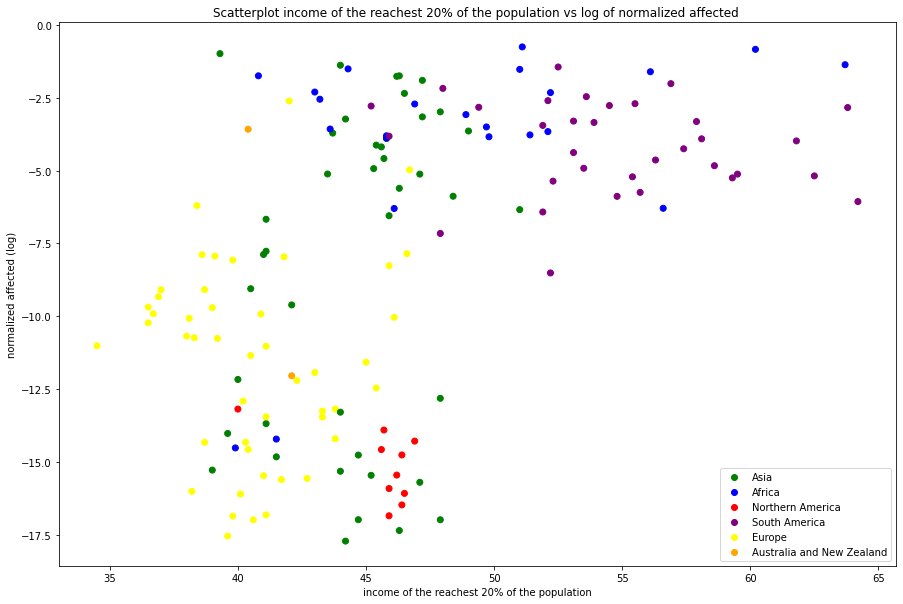

In [97]:
plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'income_1_of_the_highest_20%'],np.log(Affected_dataset ['Total Affected normalized']) ,c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.title('Scatterplot income of the reachest 20% of the population vs log of normalized affected ')
plt.xlabel('income of the reachest 20% of the population')
plt.ylabel('normalized affected (log)')
plt.show()

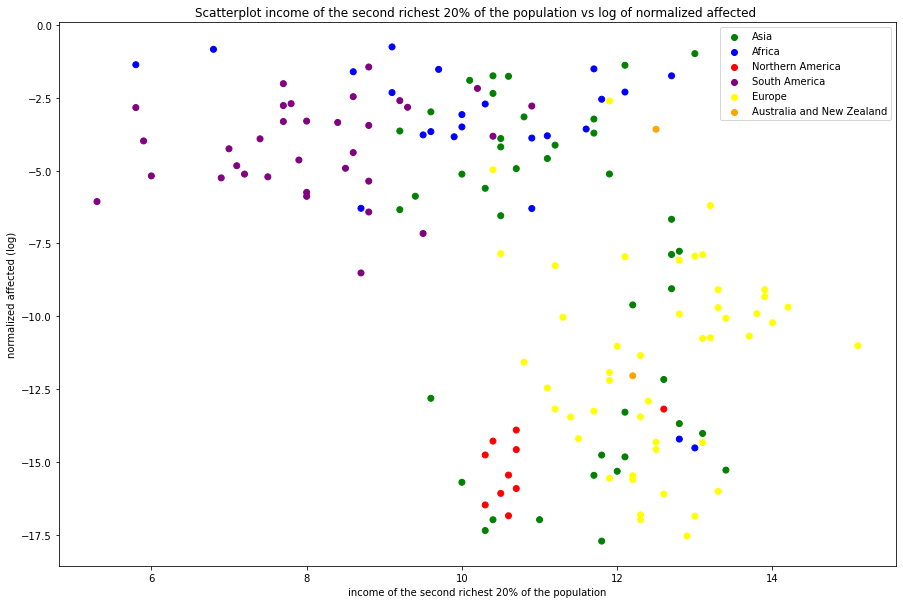

In [98]:

plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'income_2_of_the_second_20%'],np.log(Affected_dataset ['Total Affected normalized']) ,c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.title('Scatterplot income of the second richest 20% of the population vs log of normalized affected ')
plt.xlabel('income of the second richest 20% of the population')
plt.ylabel('normalized affected (log)')
plt.show()

I seems to exist a symmetry between this and the previous diagram. We could argue that this has to do with the fact that the difference detween the richest 20% of the population and the rest of the population is how inequality is defined. And there are many results showing that inequality is a negative factor during natural disasters. 

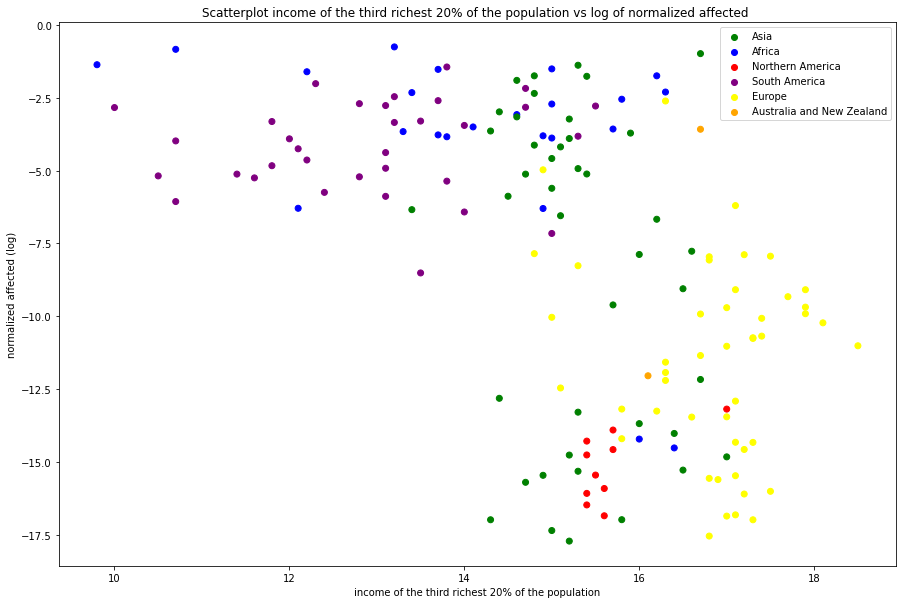

In [99]:


plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'income_3_of_the_third_20%'],np.log(Affected_dataset ['Total Affected normalized']) ,c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.title('Scatterplot income of the third richest 20% of the population vs log of normalized affected ')
plt.xlabel('income of the third richest 20% of the population')
plt.ylabel('normalized affected (log)')
plt.show()

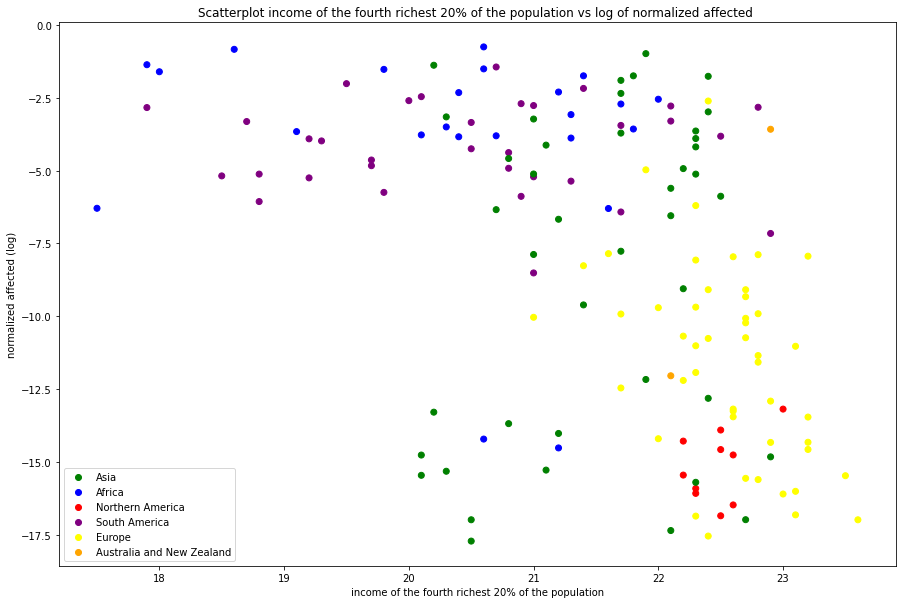

In [100]:



plt.figure(figsize=(15,10))
plt.scatter(Affected_dataset [ 'income_4_of_the_fourth_20%'],np.log(Affected_dataset ['Total Affected normalized']) ,c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.title('Scatterplot income of the fourth richest 20% of the population vs log of normalized affected ')
plt.xlabel('income of the fourth richest 20% of the population')
plt.ylabel('normalized affected (log)')
plt.show()

In [101]:
Financial_Dataset = pd.merge(Affected_dataset,energy_consumption , on =['ISO','Year'])

In [102]:
Financial_Dataset.columns

Index(['Country Name', 'Country Code', 'Year', 'GDP_per_capita',
       'Cerial_Yields', 'GDP_absolut', 'GDP_agriculture', 'GDP_exports',
       'GDP_industry', 'Imports_percent_GDP',
       'Annua_freshwater_withdrawal_total', 'Agricultural_Land',
       'Arable_Land_Percentage', 'income_1_of_the_highest_20%',
       'income_2_of_the_second_20%', 'income_3_of_the_third_20%',
       'income_4_of_the_fourth_20%', 'income_5_of_the_lowest_20%', 'ISO',
       'Disaster Subtype', 'Region', 'Continent', 'Dis No', 'Total Affected',
       'Population', 'Total Affected normalized', 'Entity', 'Code',
       'Primary energy consumption (TWh)'],
      dtype='object')

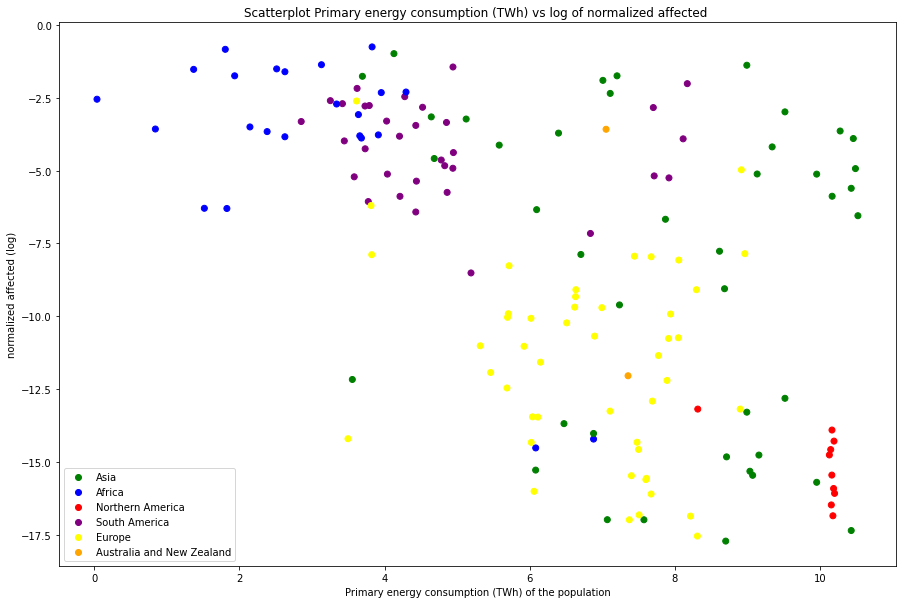

In [103]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(Financial_Dataset [ 'Primary energy consumption (TWh)']),np.log(Financial_Dataset ['Total Affected normalized']) ,c =[colours[c] for c in Affected_dataset['Region']],label=Affected_dataset['Region'])

handles = []
for category, color in colours.items():
    handles.append(plt.scatter([], [], c=color, label=category))
plt.legend(handles=handles)

plt.title('Scatterplot Primary energy consumption (TWh) vs log of normalized affected ')
plt.xlabel('Primary energy consumption (TWh) of the population')
plt.ylabel('normalized affected (log)')
plt.show()

In [104]:

Financial_Dataset = pd.merge(Affected_dataset_messy,energy_consumption , on =['ISO','Year'])

In [105]:
Financial_Dataset = Financial_Dataset.drop(['Country Code','Entity','Code'],axis=1)


In [25]:
ND_GDPC['Deaths per 100.000'] = (ND_GDPC['Total Deaths']/ND_GDPC['population'])*1000000

In [26]:
ND_GDPC['Affected per 100.000'] = (ND_GDPC['Total Affected']/ND_GDPC['population'])*1000000

In [28]:
ND_GDPC_Continent = ND_GDPC.groupby(['Continent','Year']).agg({'Total Deaths': 'sum','Total Affected': 'sum', "Total Damages ('000 US$)": 'sum','Deaths per 100.000':'sum',
                                                               'Affected per 100.000':'sum', 'GDPC' :'mean'}) 

In [30]:
ND_GDPC_1995 = ND_GDPC[ND_GDPC['Year'] >= 1995]

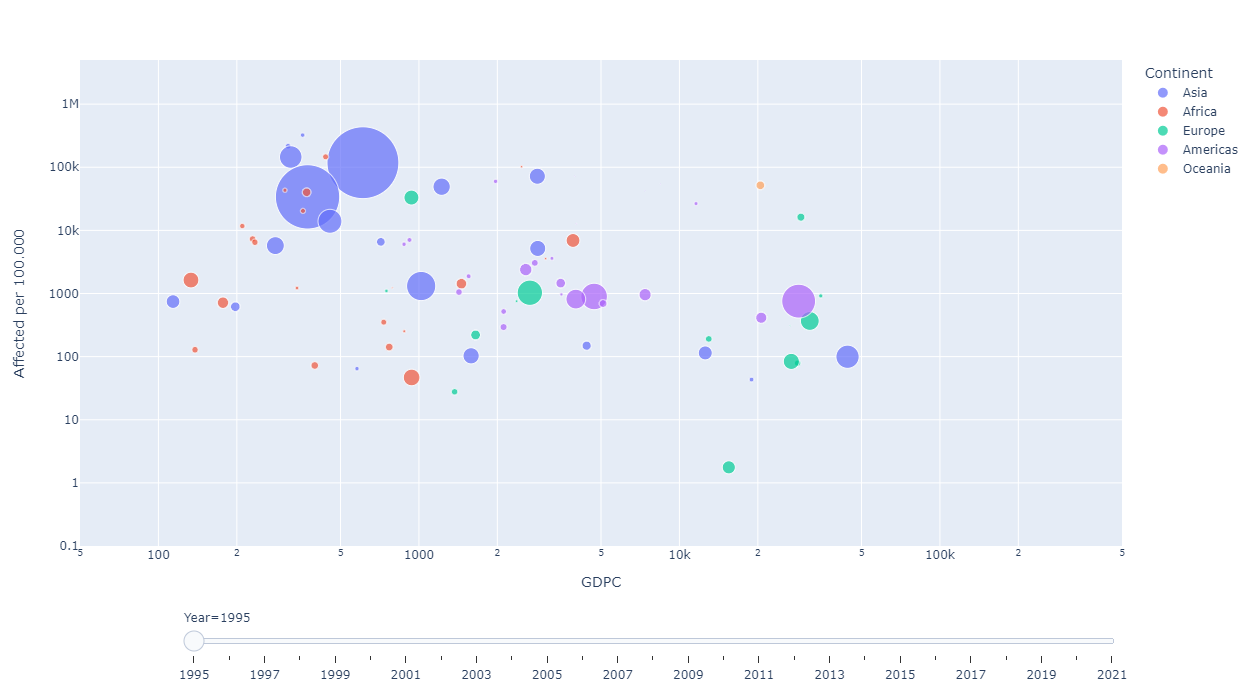

In [33]:
df = px.data.gapminder()
fig = px.scatter(ND_GDPC_1995, x="GDPC", y="Affected per 100.000", animation_frame="Year", animation_group="Country",
           size="population", color="Continent", hover_name="Country",
           log_x=True, log_y=True, size_max=55, range_x=[50,500000], range_y=[0.1,5000000])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(width=900, height=700)
fig.write_html("scatter_gdpc.html")
fig.show()

### Clustering analysing 

In [115]:
# We remove the text columns and year
text_columns = ['Country Name', 'Country Code', 'ISO', 'Disaster Subtype', 'Continent', 'Region']

df = Affected_dataset.drop(['Year'] + text_columns, axis=1)

In [116]:
# We standardize the data
scaler = StandardScaler()
df_numeric_std = scaler.fit_transform(df)

In [117]:
# We want to find the optimal number of cluster and for this we use the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric_std)
    inertia.append(kmeans.inertia_)

C:\Users\asmun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\asmun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\asmun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\asmun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

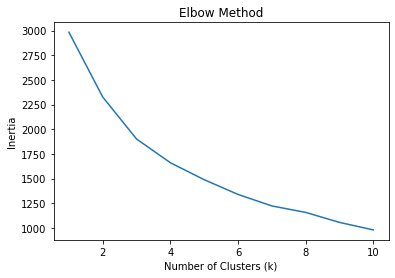

In [118]:
# Plot the inertia values to determine the optimal number of clusters,
# we see that the optimal value lies between 2 and 3 
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [119]:
# We Choose the optimal number of clusters based on the elbow plot
optimal_k = 3

# We Run K-means algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_numeric_std)

# We Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

C:\Users\asmun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\asmun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [120]:
# We merge, to see where the different countries have of clusters etc.  
merged_df = df.merge(Affected_dataset, left_index=True, right_index=True)

In [121]:
# We run some code to get insights on the clusters

# We group the data by cluster
cluster_groups = merged_df.groupby('Cluster')

# We iterate over each cluster group
for cluster_label, cluster_data in cluster_groups:
    # We perform analysis or operations on the cluster data
    print("Cluster:", cluster_label)
    
    # We iterate over each column in the cluster data
    for column in cluster_data.columns:
        # We check if the column contains text-based data
        if cluster_data[column].dtype == 'object':
            # We get the distinct names for the text-based column
            distinct_names = cluster_data[column].unique().tolist()
            print("Distinct names in", column, ":", distinct_names)
        else:
            # We calculate the average for numeric columns
            column_average = cluster_data[column].mean()
            print("Average of", column, ":", column_average)
    
    print()

Cluster: 0
Average of GDP_per_capita_x : 15057.330469047536
Average of Cerial_Yields_x : 4948.762068965519
Average of GDP_absolut_x : 6824905597298.226
Average of GDP_agriculture_x : 9.636364443798003
Average of GDP_exports_x : 18.8792428398932
Average of GDP_industry_x : 32.43232029827039
Average of Imports_percent_GDP_x : 19.379178485188113
Average of Annua_freshwater_withdrawal_total_x : 556.3380899973034
Average of Agricultural_Land_x : 53.776318658311844
Average of Arable_Land_Percentage_x : 25.571782570427537
Average of income_1_of_the_highest_20%_x : 45.820689655172416
Average of income_2_of_the_second_20%_x : 10.741379310344827
Average of income_3_of_the_third_20%_x : 15.179310344827586
Average of income_4_of_the_fourth_20%_x : 21.81379310344828
Average of income_5_of_the_lowest_20%_x : 6.420689655172414
Average of Dis No_x : 1.206896551724138
Average of Total Affected_x : 17729068.03448276
Average of Population_x : 994322760.5517242
Average of Total Affected normalized_x : 0.0

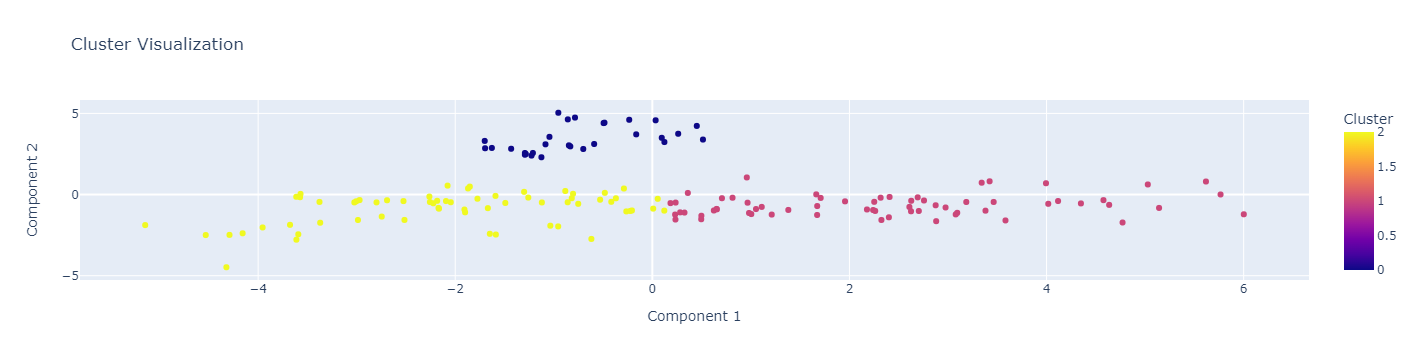

In [122]:
# We run PCA to plot the results in to dimensions
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Rest of your code...

# Reduce the dimensions of the scaled data using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_numeric_std)

# Create a dataframe with the PCA data and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = kmeans.labels_

# Create an interactive scatter plot with Plotly
fig = px.scatter(pca_df, x='Component 1', y='Component 2', color='Cluster',
                 title='Cluster Visualization', hover_name=pca_df.index)

# Customize the plot layout
fig.update_layout(
    showlegend=True,
    legend_title='Cluster',
    xaxis_title='Component 1',
    yaxis_title='Component 2',
)

# Save the plot as an HTML file
fig.write_html("cluster_visualization.html")

# Show the plot
fig.show()

## 4. Genre

We chose a Magazine Style as our main genre. This style would best fit the story and the data we had. We also have maps to give the reader a geographical understanding of our story and how the effects of natural disasters are different between countries 

### 4.1 Which tools did you use from each of the 3 categories of *Visual Narrative* (Figure 7 in Segal and Heer). Why?

From the **visual structuring** category, we used a progress bar in the introductory scatter plot and map of the world. To give the reader how natural disasters are getting more frequent and what are the trends in the last few decent 
From the **highlighting** category, we used close-ups and zooming functions on our maps and some of the interactive plots to allow the reader to zoom in on specific countries, data points and clusters. We also used motion in the first scatterplot to draw in the reader to intreducing him to the relationship between GPD per capita and people affected by natural disasters per 100.000 
The **transition guidance** category did not apply to our project so none of the strategies from that category were used.


### 4.2 Which tools did you use from each of the 3 categories of *Narrative Structure* (Figure 7 in Segal and Heer). Why?

From the **ordering** category, we used a mix of Linear ordering and user Dricted path because the story is told linearly in each sub-article on the website. Still, the reader can choose what sub-article to read and in what order.
From the **interactive** category, we used filtering and Selection. For example, we allowed the reader to select which countries were featured on some of our plots based on which continent the country is. Some of our scatter plots had Stimulating Default Views to draw the reader into introducing specific relationships between economic data and the effects of natural disasters. This was all done to guide the user through the visualization.
Lastly, from the **messaging** category, we used introductory text in the first sub-article to introduce the readers to the topics we would cover. 	



## 5. Visualization

### 5.1/2 Explain the visualizations you've chosen. Why are they right for the story you want to tell?

#### Bar Chart
The main visualization tool used. Gives an overview of the data and reasoning for further visualizations. By looking at the bar chart the peak in accidents during rush hour is clear which is one of the main discoveries. They also give a quick and understanding overview of the data set.

#### Interactive bar charts
Here the user can filter out certain accident types in the giving a more in depth visualization of each accident type. This also allows for more freedom in exploring without being overwhelmed by a lot of information by choosing what to explore. 

#### Maps
A map was used to visualize where the meters that measure traffic flow are located. This helps us build a basis for 

#### Heat maps over time
To give the user a visual aid to see trends in the data with respect to months, weekdays and hours of the 24 hour cycle.


#### Interactive maps
To give the user freedom to explore the different accident types with respect to weather and seasons.


#### Self organizing maps
Used in the machine learning part of the project. To show that unsupervised learning can cluster together serious and fatal accidents.


## 6. Discussion. Think critically about your creation

### 6.1 What went well?

### 6.2 What is still missing? What could be improved?, Why?

## 7. Contributions. Who did what?